In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [4]:

%matplotlib inline

In [5]:
cd /Users/xpandachuy/Projects/kaggle/EEG_Detection_Grasp_Lift/

/Users/xpandachuy/Projects/kaggle/EEG_Detection_Grasp_Lift


In [6]:
series = pd.read_csv('train/subj6_series1_data.csv', index_col=0)
print(series.head())

                 Fp1  Fp2   F7   F3   Fz   F4   F8  FC5  FC1  FC2  ...    P7  \
id                                                                 ...         
subj6_series1_0  181  319  218  203  182  431  234  433  421  -60  ...   320   
subj6_series1_1  176  304  223  211  195  433  237  464  420  -77  ...   344   
subj6_series1_2  226  314  276  227  196  464  302  510  420  -75  ...   385   
subj6_series1_3  294  358  354  262  218  450  307  544  441  -57  ...   454   
subj6_series1_4  349  390  391  288  223  469  270  559  433  -53  ...   548   

                  P3   Pz   P4   P8  PO9   O1   Oz   O2  PO10  
id                                                             
subj6_series1_0  706  385  160   99  183  788 -439  198   327  
subj6_series1_1  727  422  171  168  164  782 -431  176   276  
subj6_series1_2  742  411  144  176  -41  762 -470  164   177  
subj6_series1_3  752  422  161  195 -245  770 -457  178   143  
subj6_series1_4  779  448  183  298   12  778 -510  133

In [7]:
events = pd.read_csv('train/subj6_series1_events.csv', index_col=0)
print(events.head())

                 HandStart  FirstDigitTouch  BothStartLoadPhase  LiftOff  \
id                                                                         
subj6_series1_0          0                0                   0        0   
subj6_series1_1          0                0                   0        0   
subj6_series1_2          0                0                   0        0   
subj6_series1_3          0                0                   0        0   
subj6_series1_4          0                0                   0        0   

                 Replace  BothReleased  
id                                      
subj6_series1_0        0             0  
subj6_series1_1        0             0  
subj6_series1_2        0             0  
subj6_series1_3        0             0  
subj6_series1_4        0             0  


In [8]:
# are there overlapping classes?
sum_events = events.sum(axis=1)

# if a row in the events data frame has sum greater than one,
# it means that more than one action is recorded at the same time
print("Number of rows where two events are happen simultaneously:", len(sum_events[sum_events == 2]))
print("Number of rows where three events are happen simultaneously:", len(sum_events[sum_events == 3]))
print("Number of rows where four events are happen simultaneously:", len(sum_events[sum_events == 4]))

Number of rows where two events are happen simultaneously: 5045
Number of rows where three events are happen simultaneously: 54
Number of rows where four events are happen simultaneously: 0


In [9]:
# let's convert the events data frame to a single vector of events
# the encoding is the following
# 0: no action occurrs
# 1: HandStart
# 2: FirstDigitTouch
# 3: BothStartLoadPhase
# 4: LiftOff
# 5: Replace
# 6: BothReleased
# NOTE: What do we do with the overlapping classes?
# For now, I'm just going to take the first label
# For example, if 'BothStartLoadPhase' and 'Replace' are both 1 in one row,
# the row looks like [0, 0, 0, 1, 1, 0], but I will say that the label for
# the row is just 3 (BothStartLoadPhase)
num_samples = len(events)
labels = np.zeros(num_samples) # start with an array of all zeros
non_zero = np.any(events.values > 0, axis=1) # get a Boolean array indicating which rows have at least one 1
# the class label is the one plus the index of the first occurrence of 1
labels[non_zero] = (np.argmax(events.values, axis=1)[non_zero] + 1) 

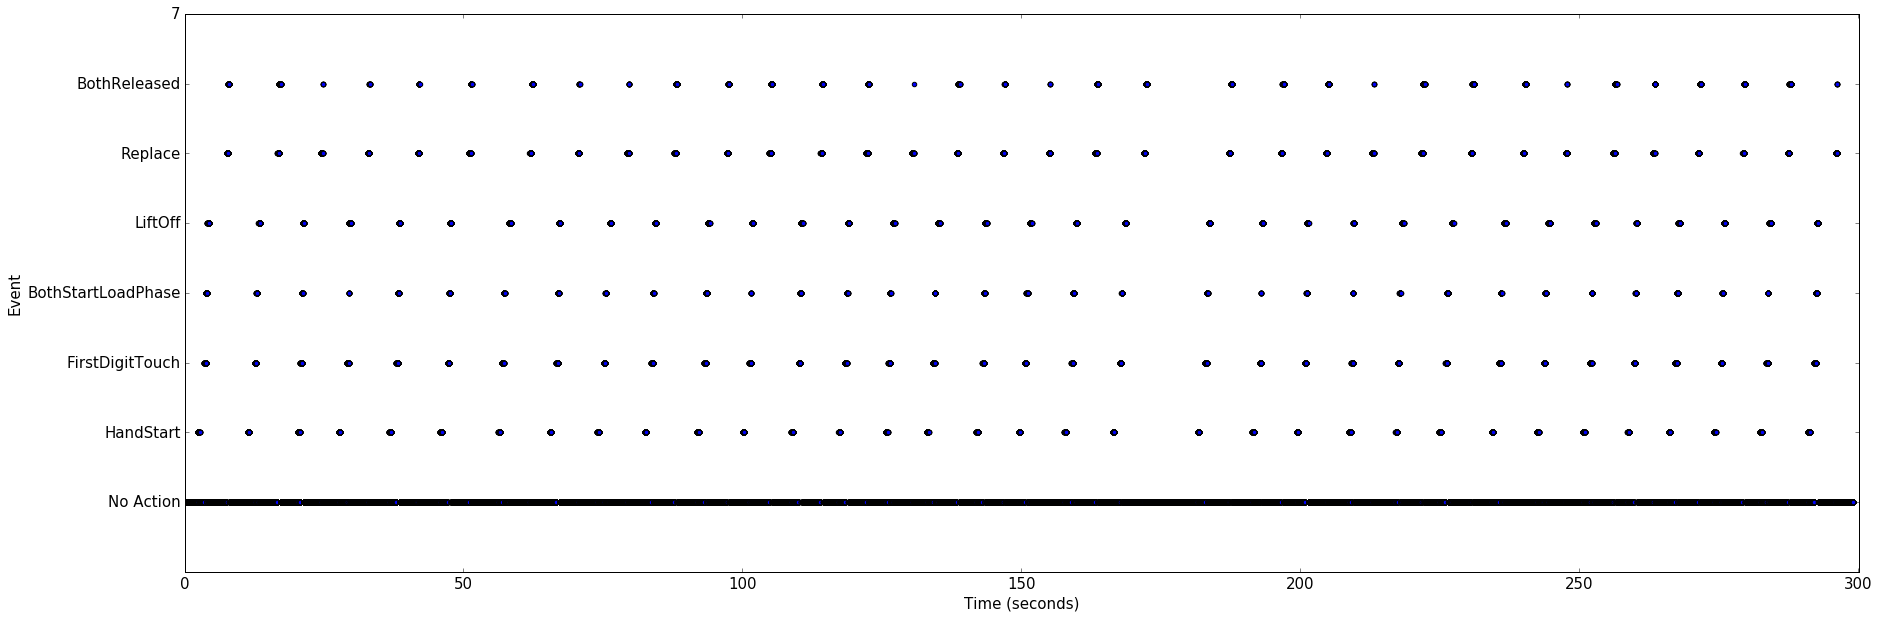

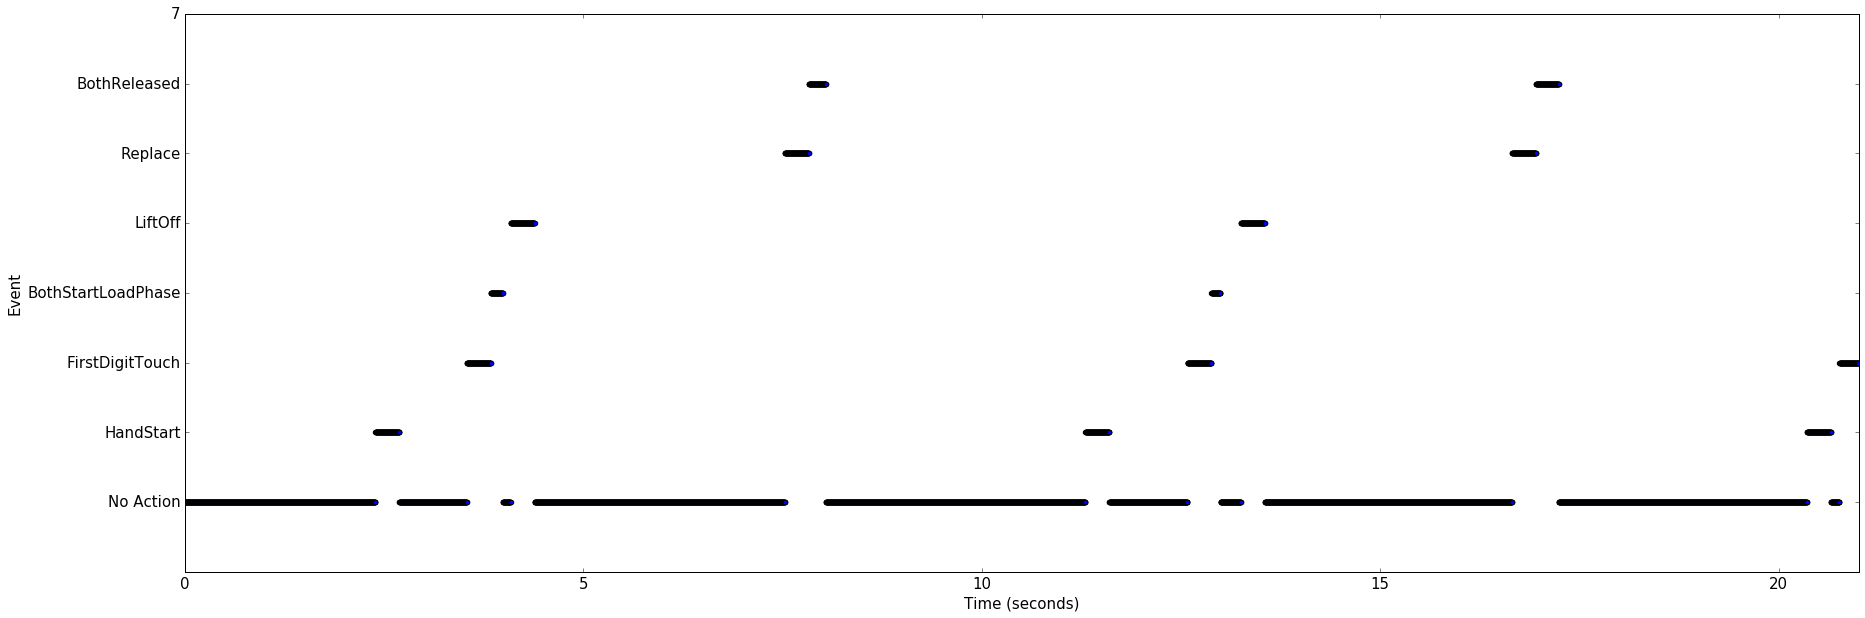

In [10]:
# OK. Let's plot it
sampling_rate = 500.
# prepare the x-axis. We divide by the sampling rate to get time in seconds
x_axis = np.arange(num_samples) / sampling_rate

# make font bigger
matplotlib.rcParams.update({'font.size': 15})

# full time series
fig = plt.gcf()
fig.set_size_inches((30, 10))
plt.scatter(x_axis, labels)
plt.xlabel('Time (seconds)')
plt.ylabel('Event')
plt.xlim(0, x_axis[-1] + 1)
locations = range(8)
names = ["No Action", "HandStart", "FirstDigitTouch", "BothStartLoadPhase", "LiftOff", "Replace", "BothReleased", "7"]
plt.yticks(locations, names)
plt.show()
plt.close()

# the first 21 seconds
fig = plt.gcf()
fig.set_size_inches((30, 10))
plt.scatter(x_axis[:10500], labels[:10500])
plt.xlabel('Time (seconds)')
plt.ylabel('Event')
plt.yticks(locations, names)
plt.xlim(0, 21)
plt.show()
plt.close()


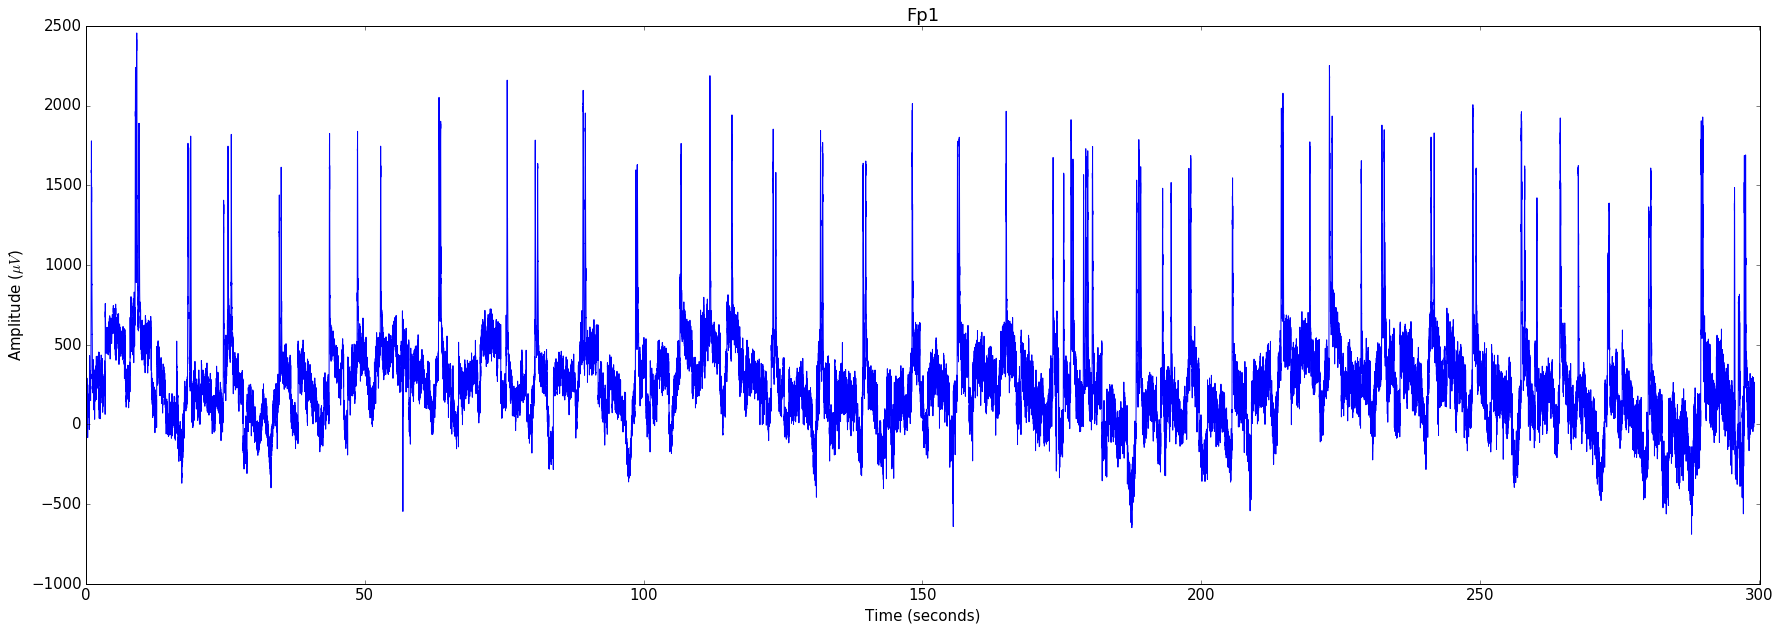

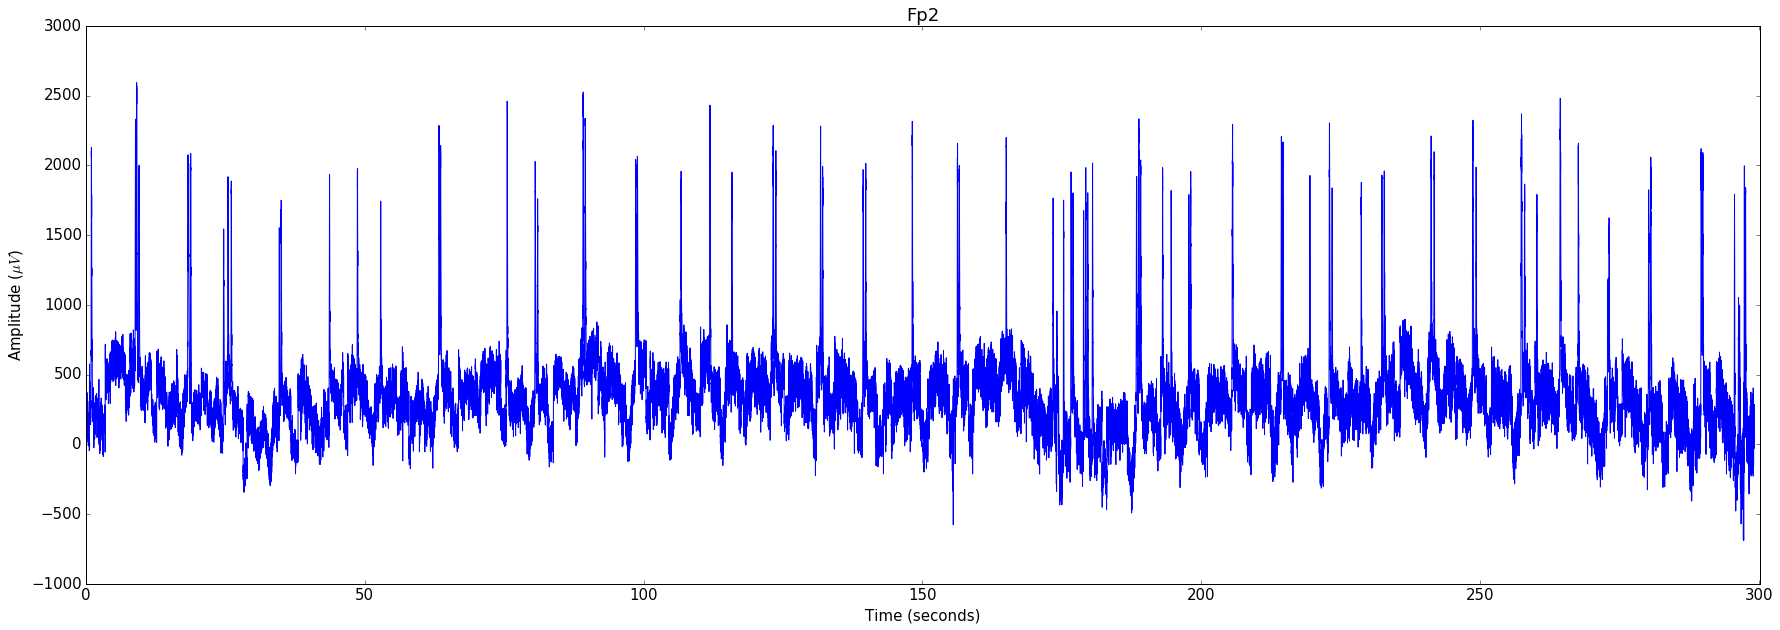

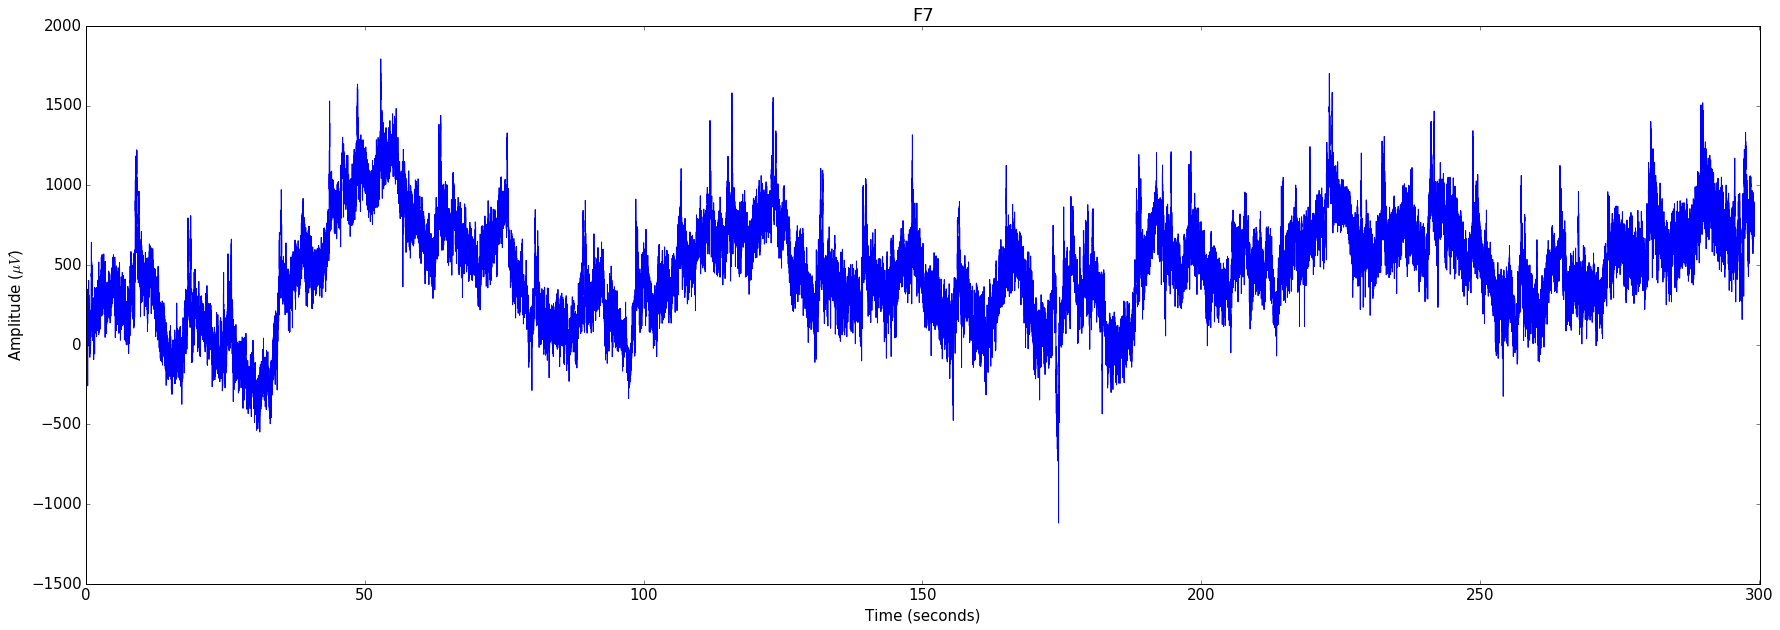

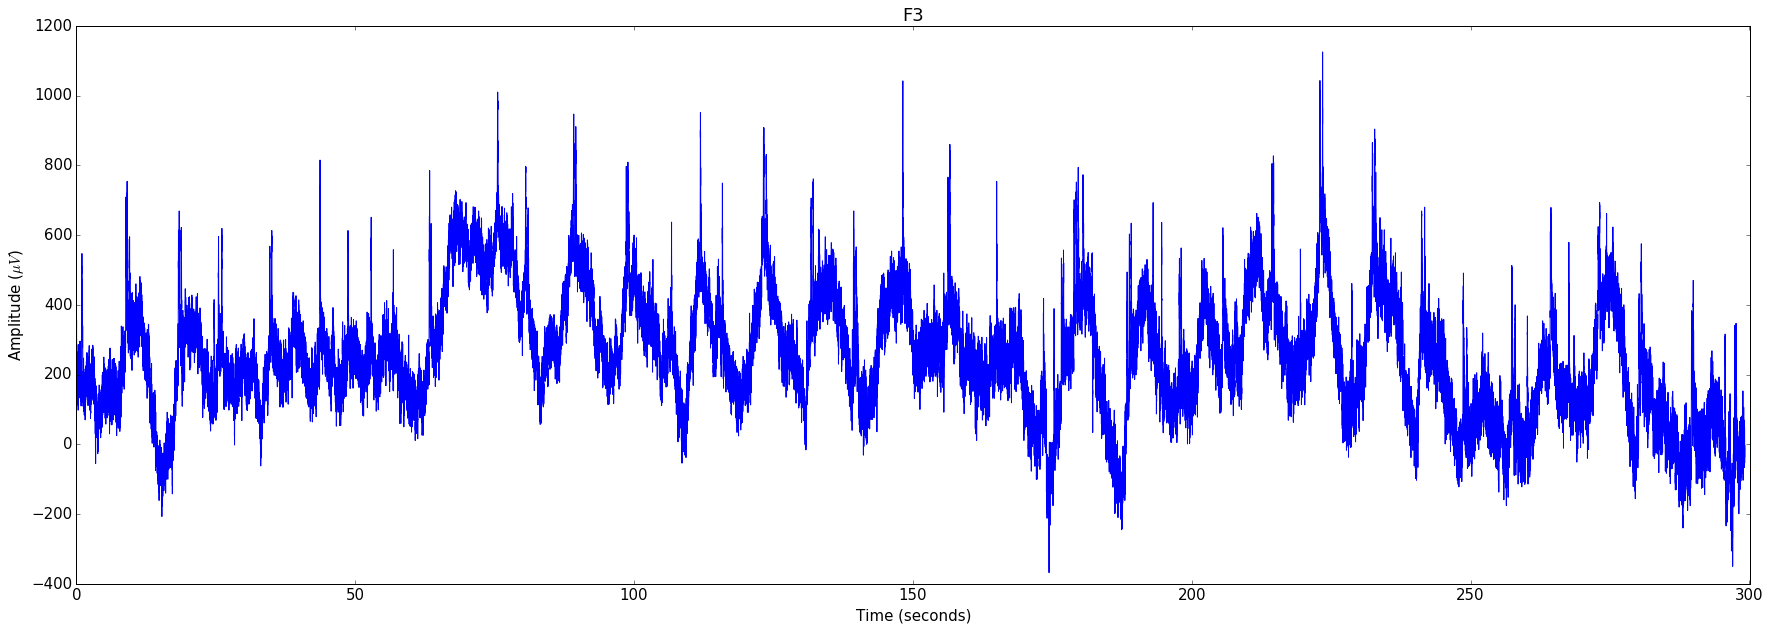

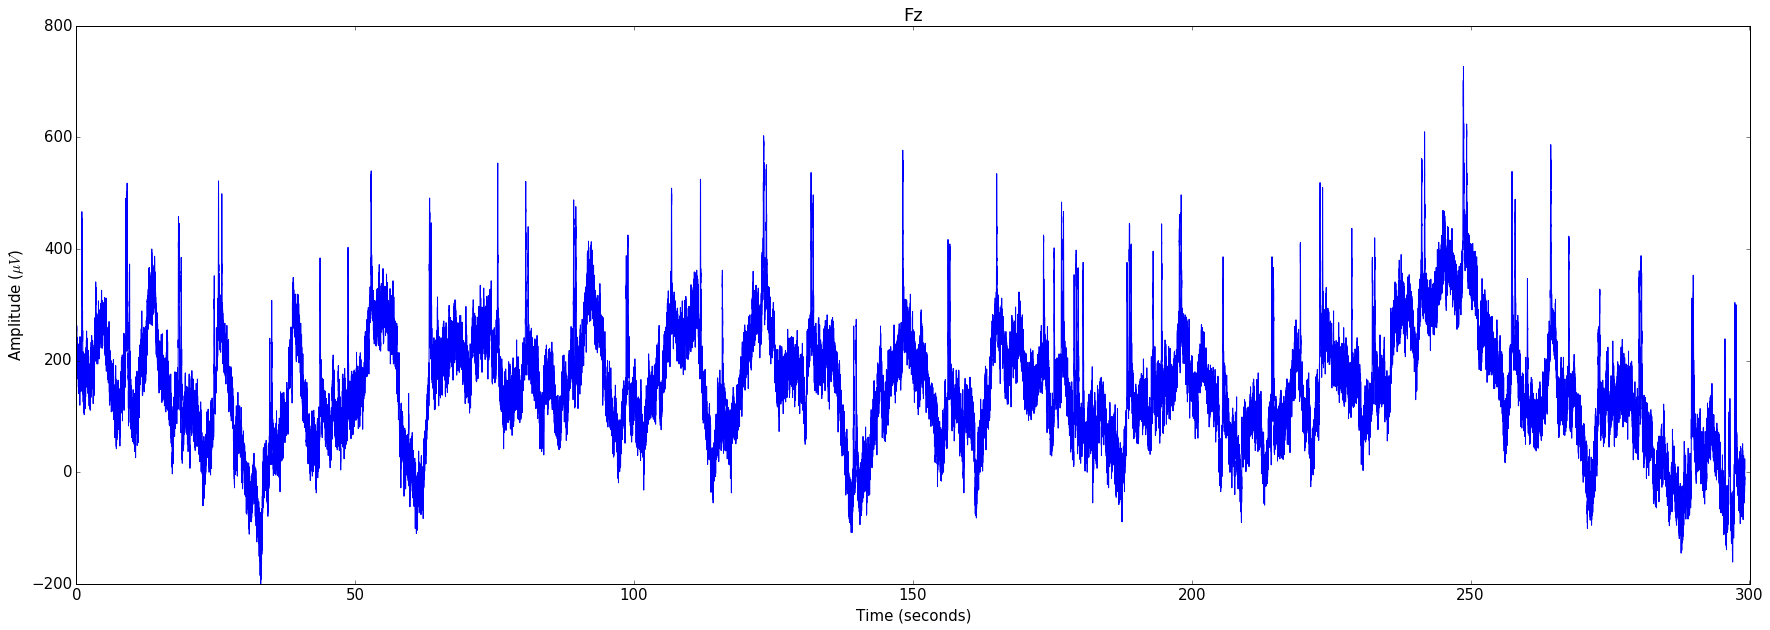

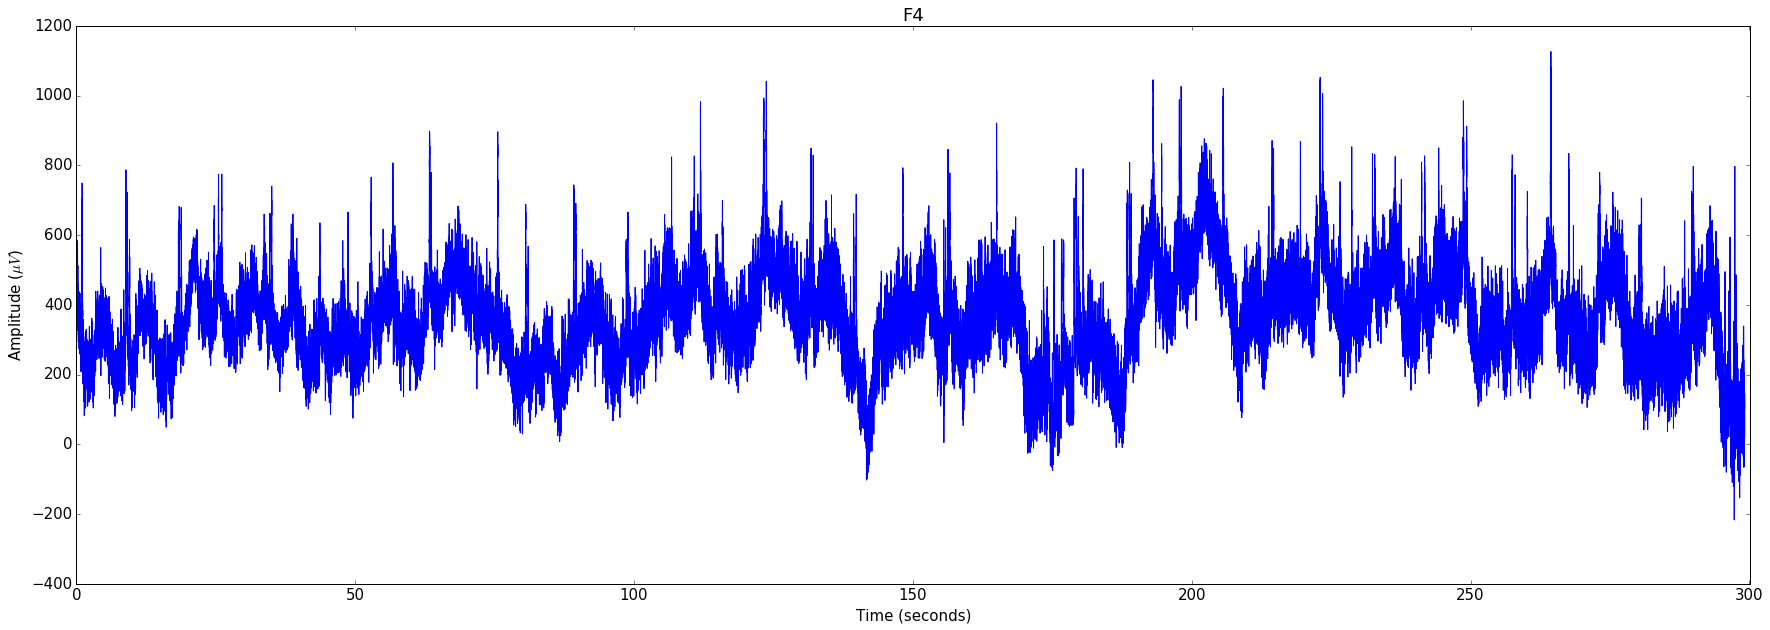

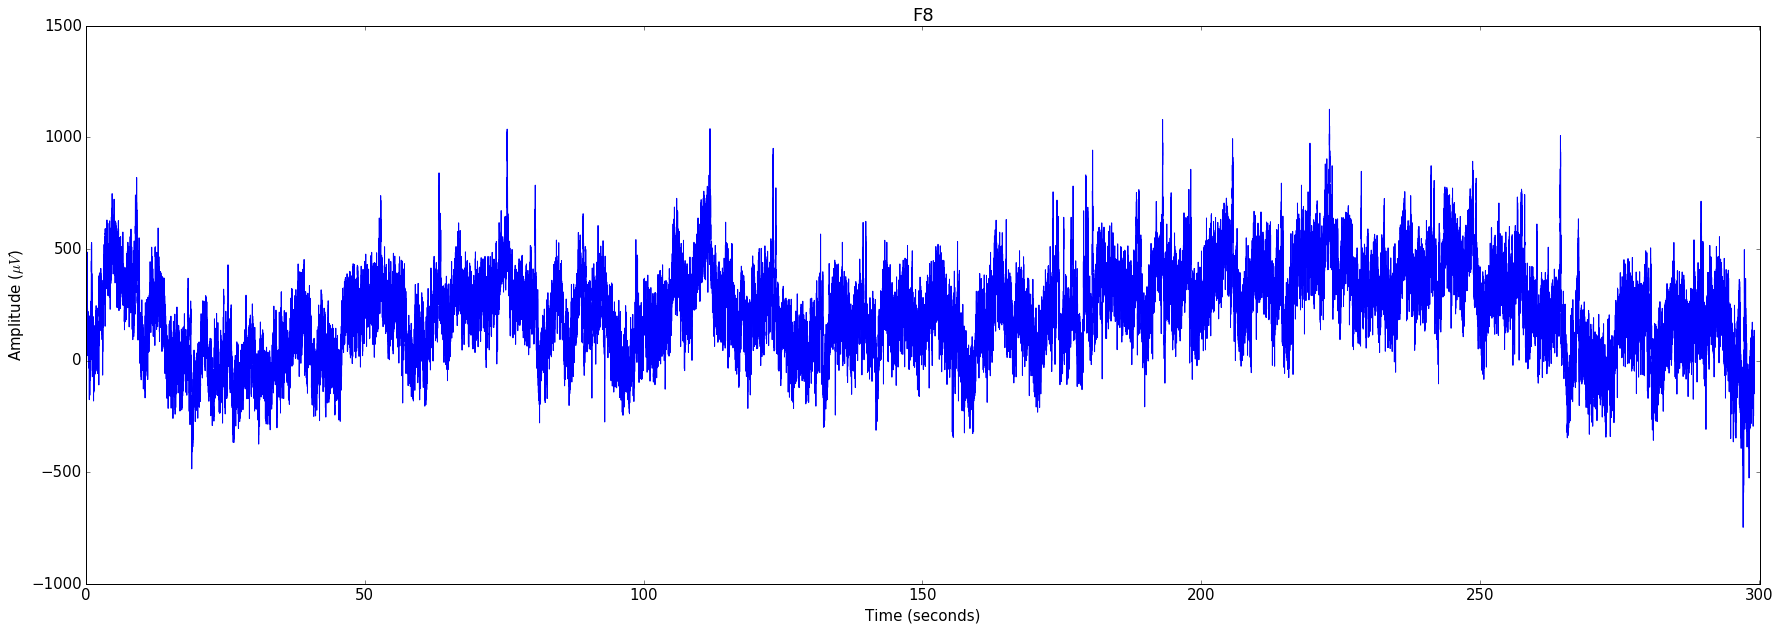

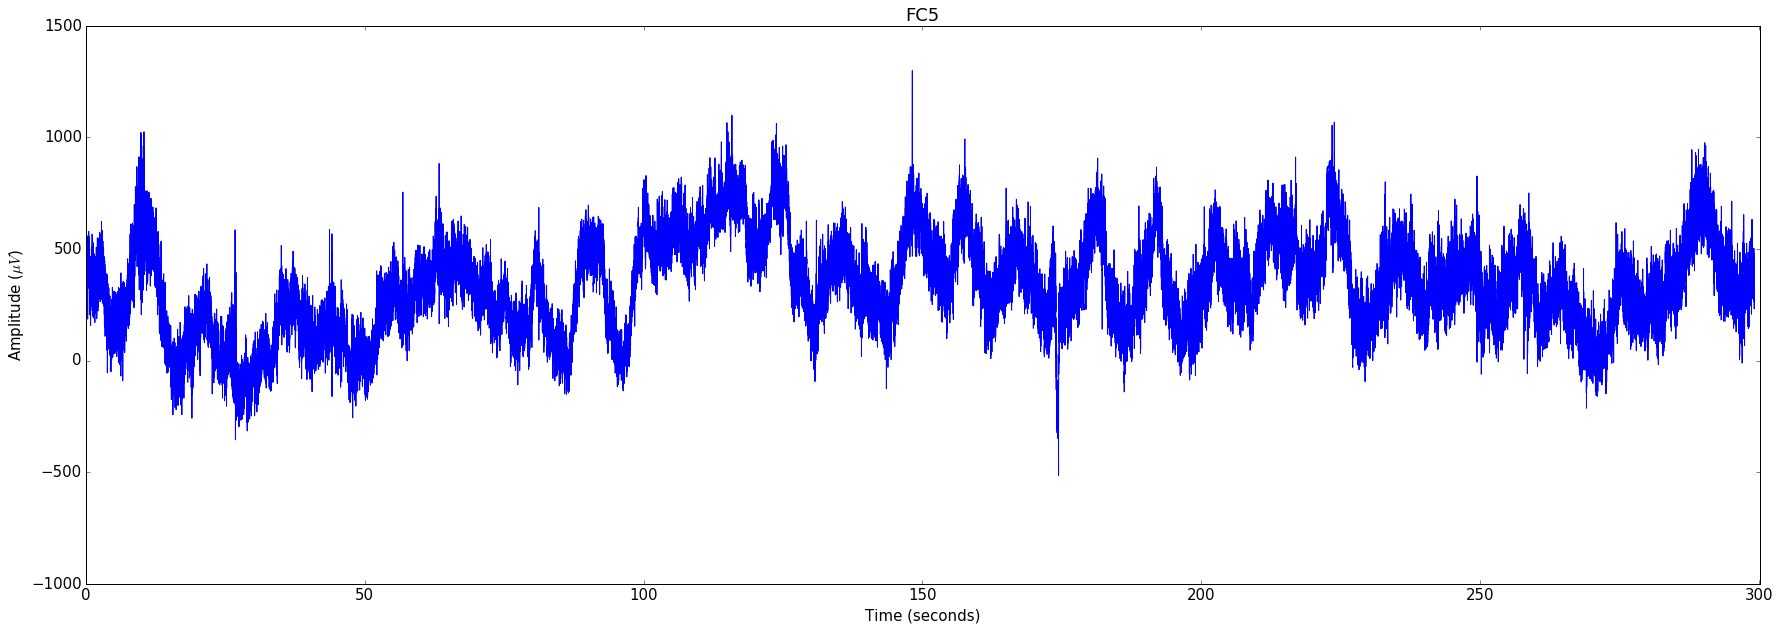

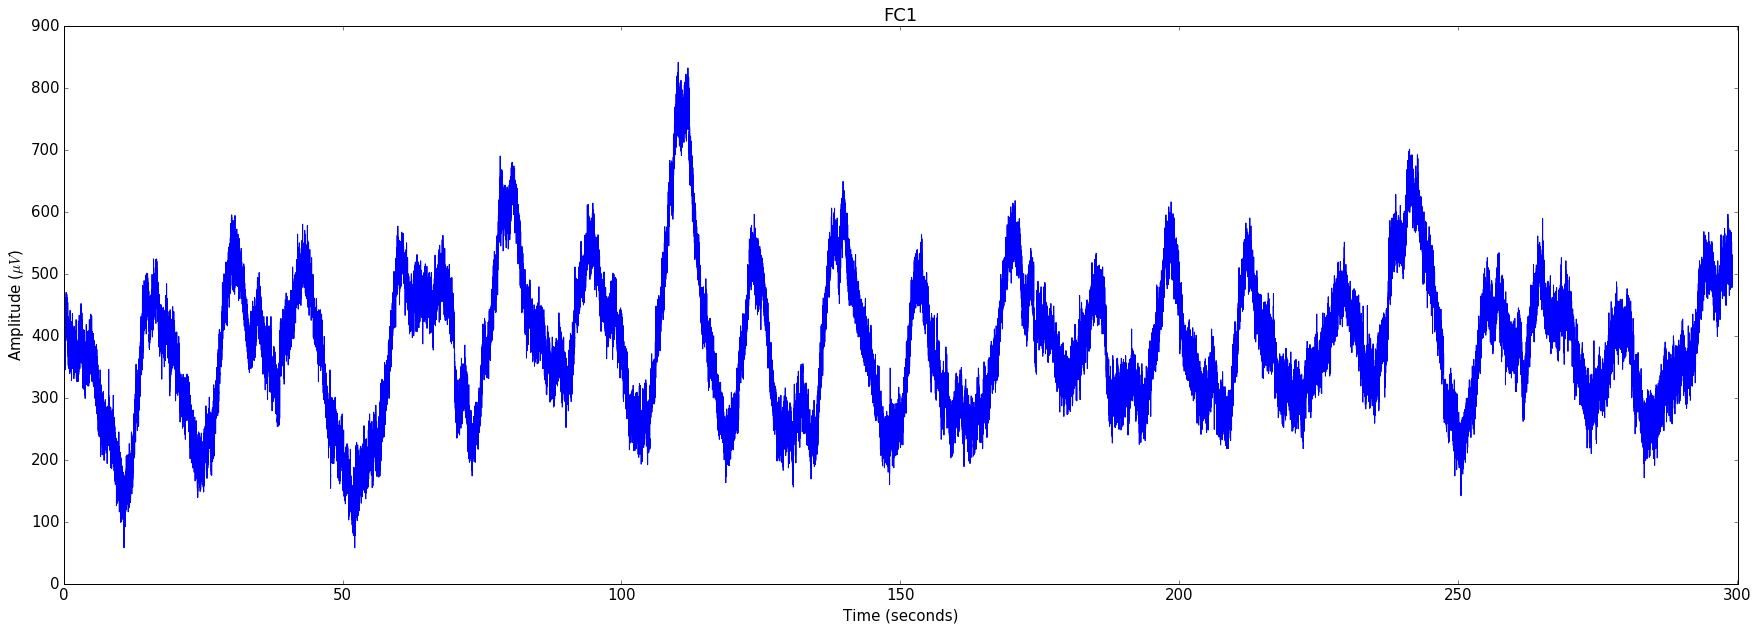

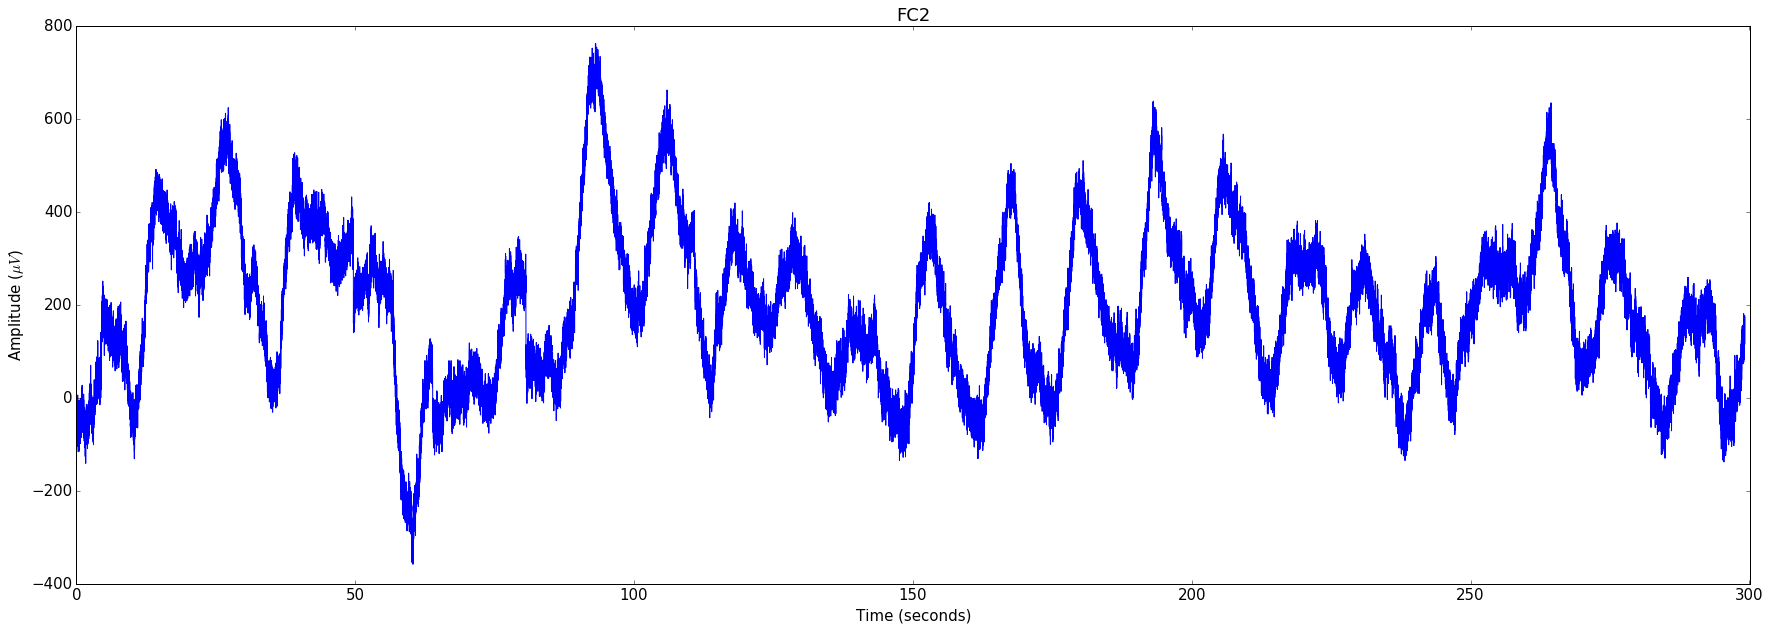

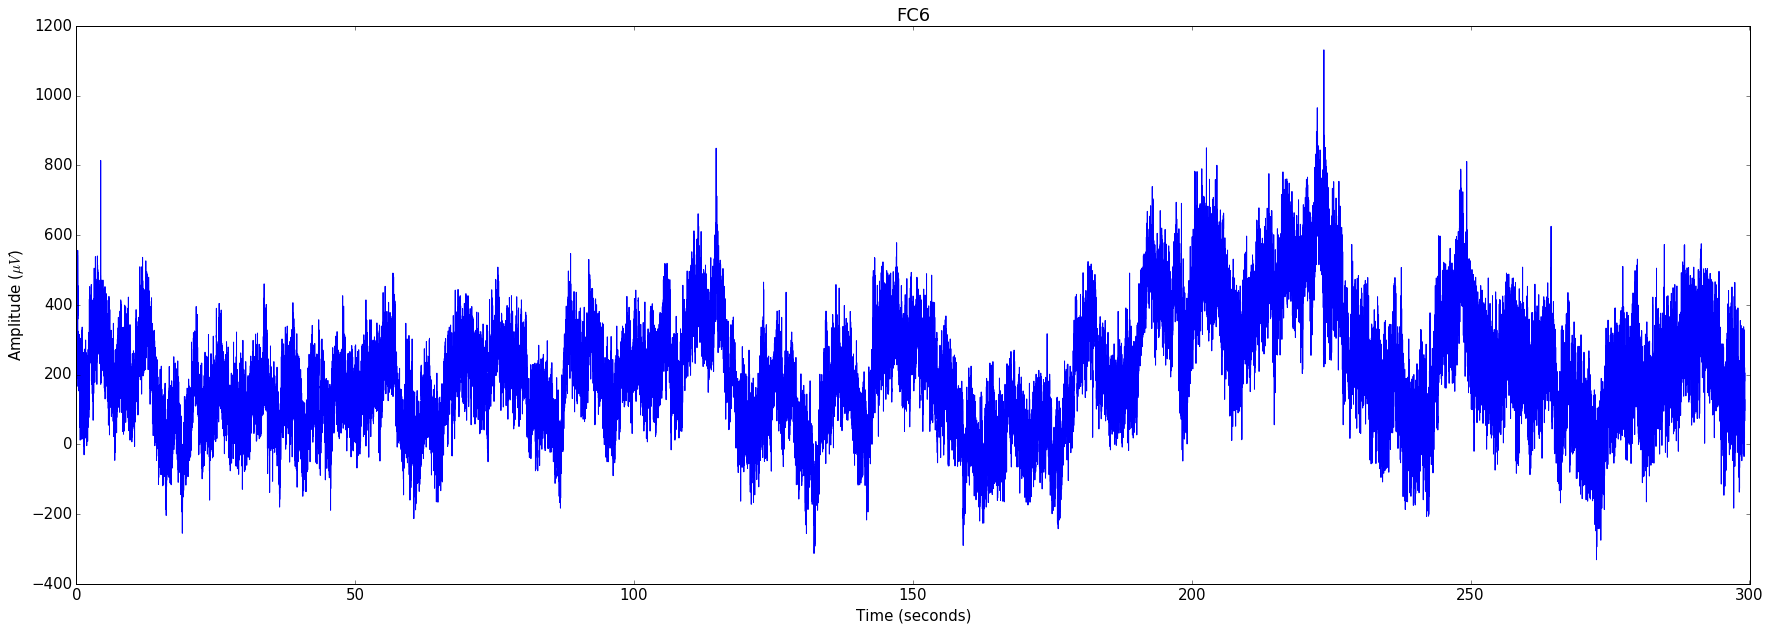

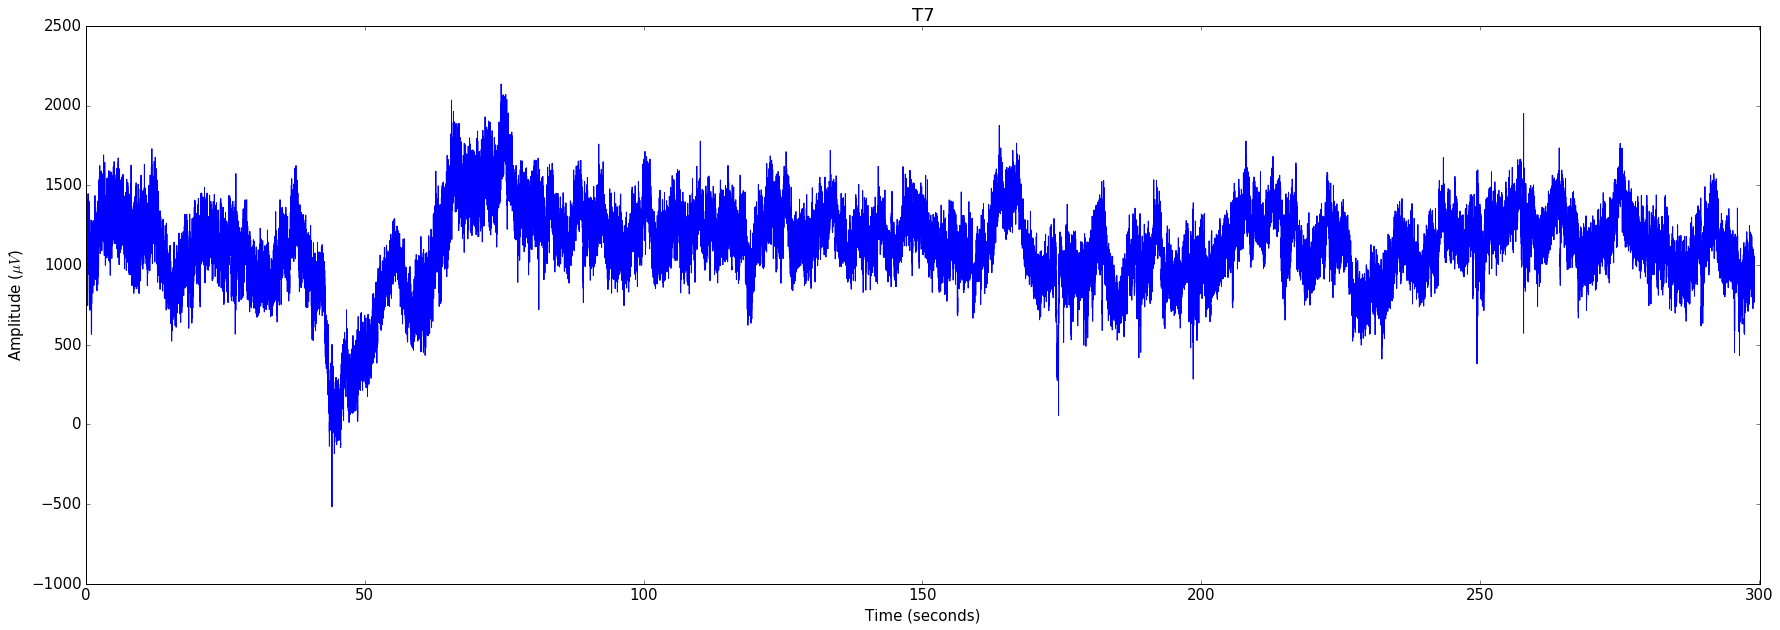

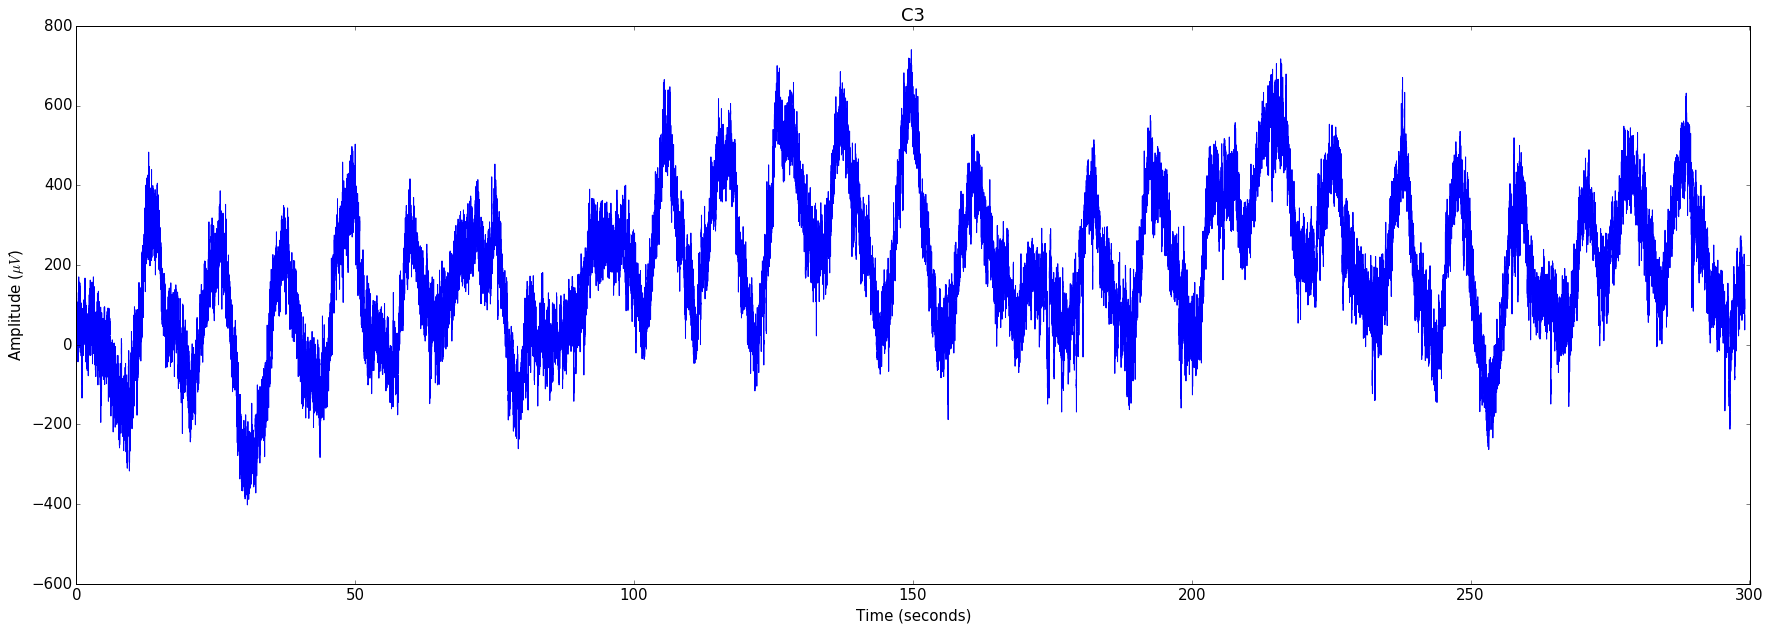

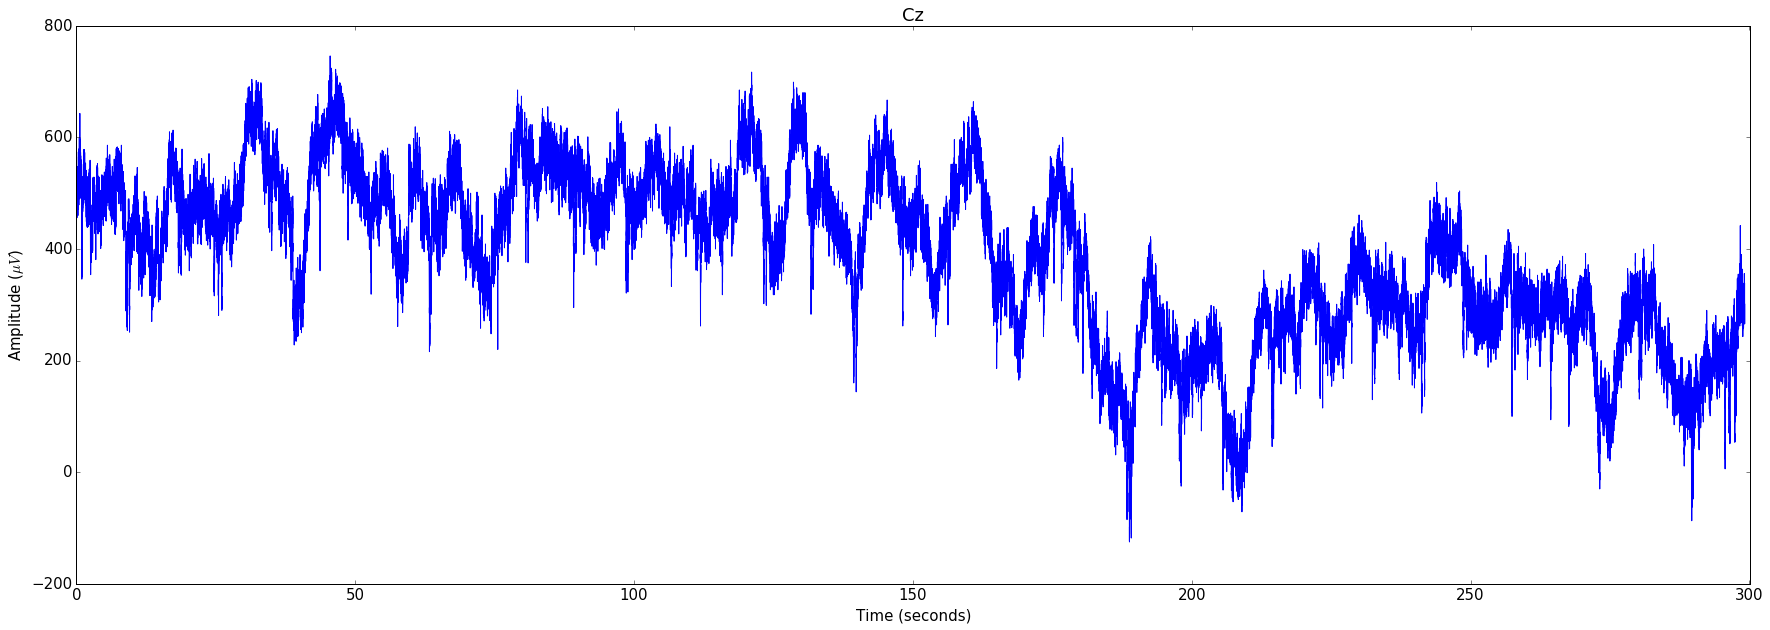

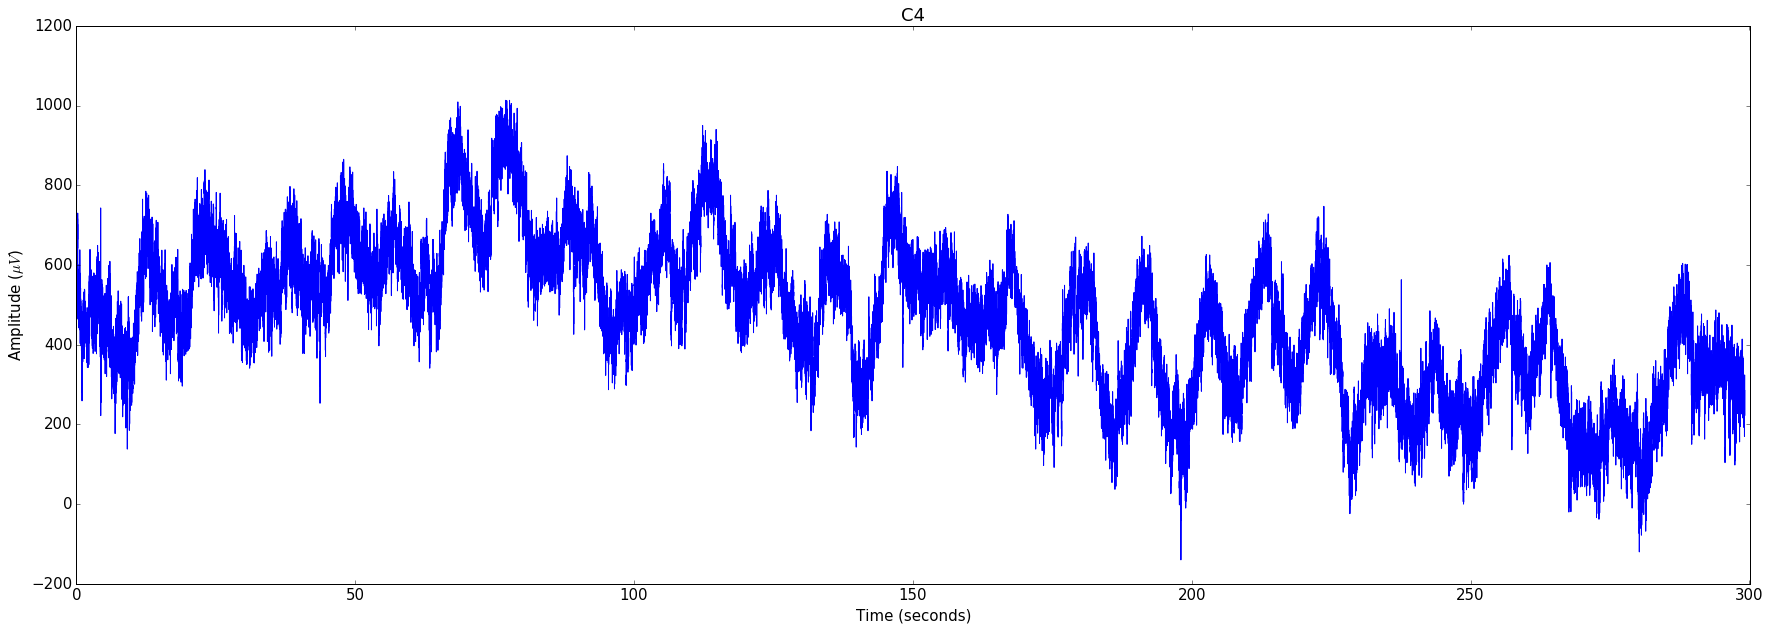

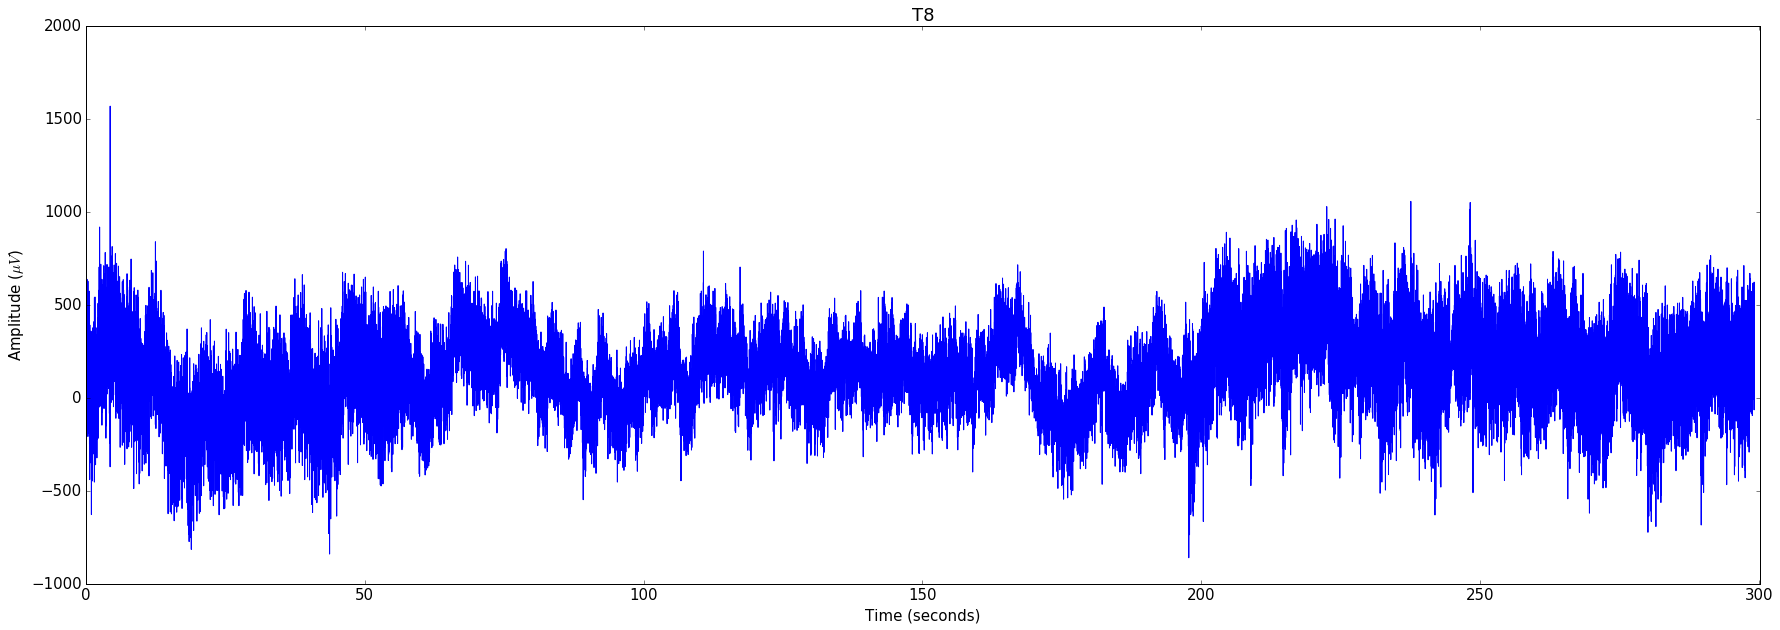

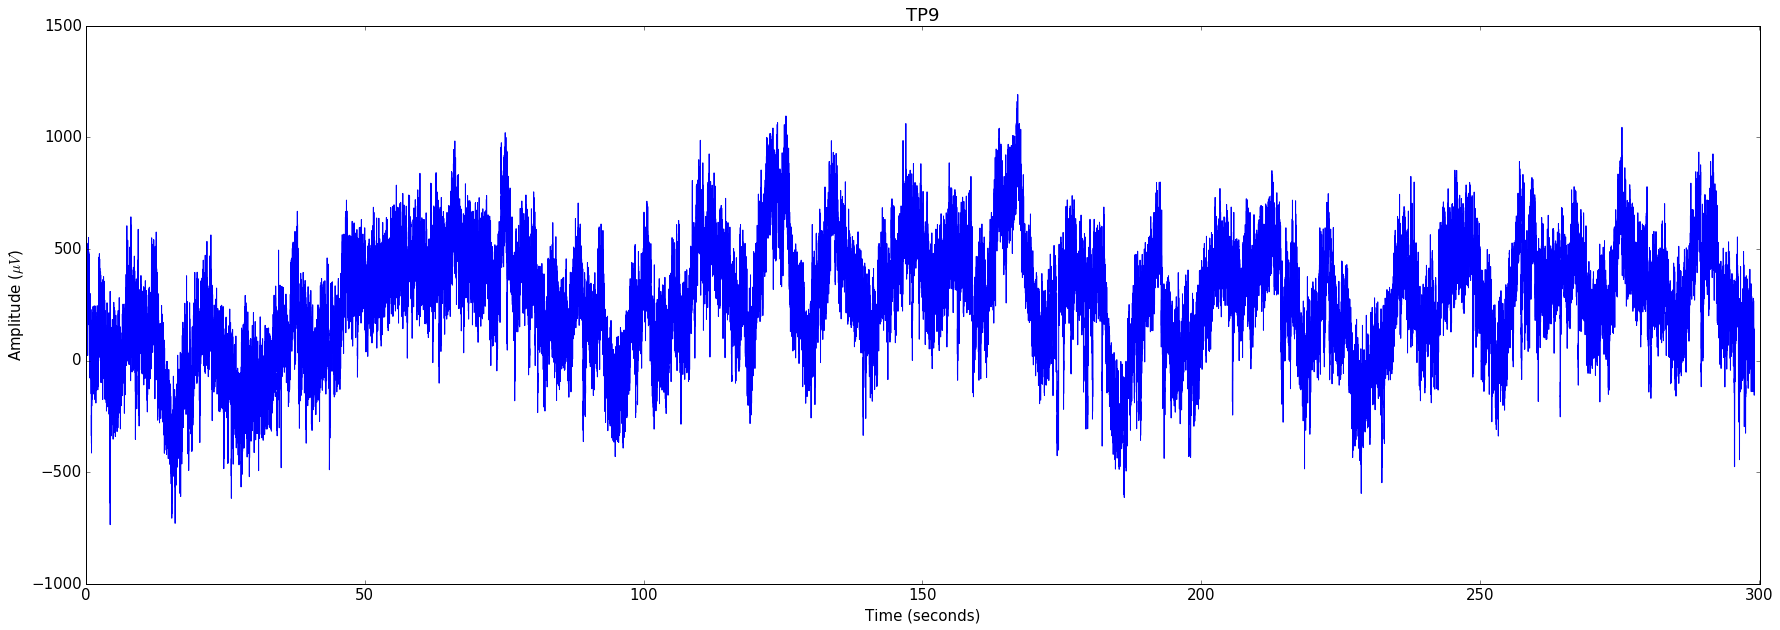

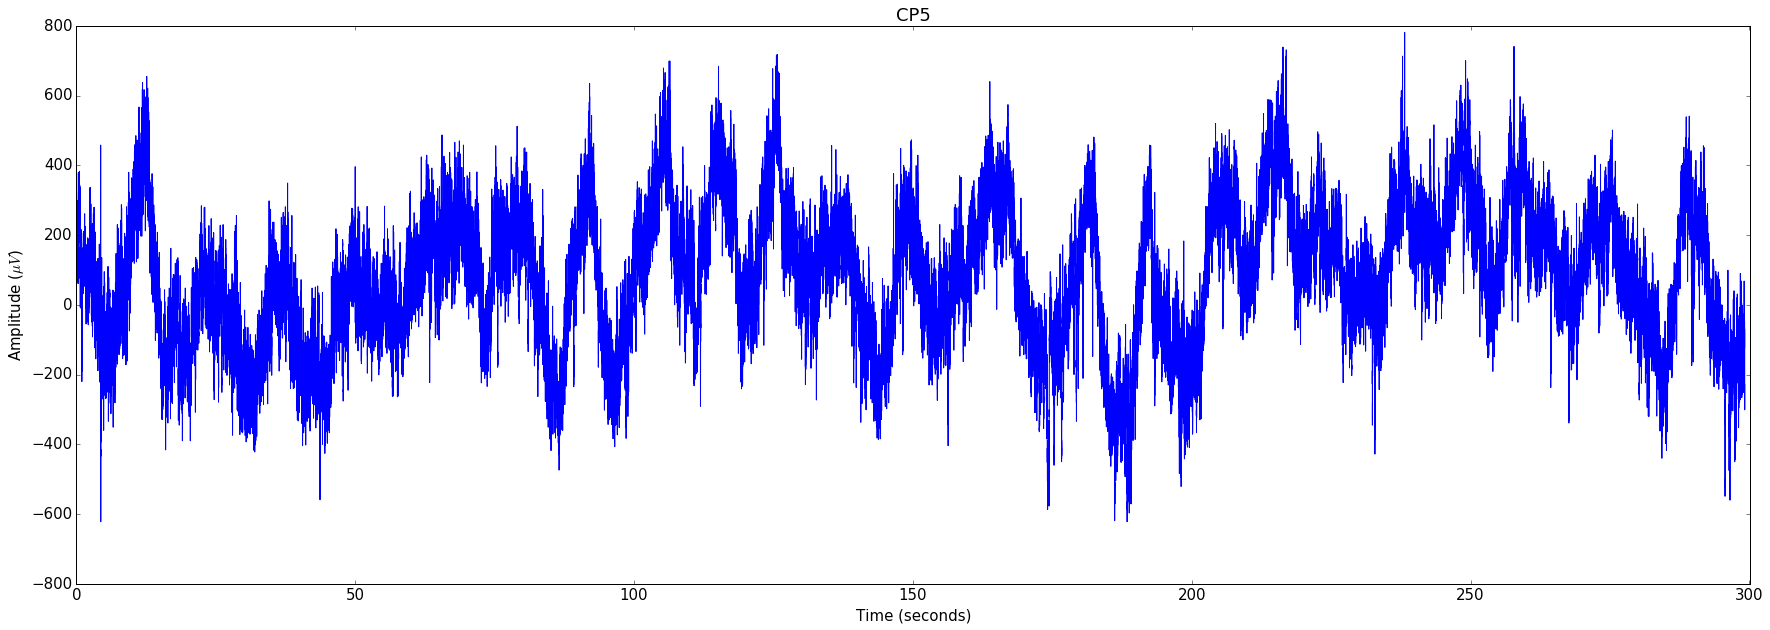

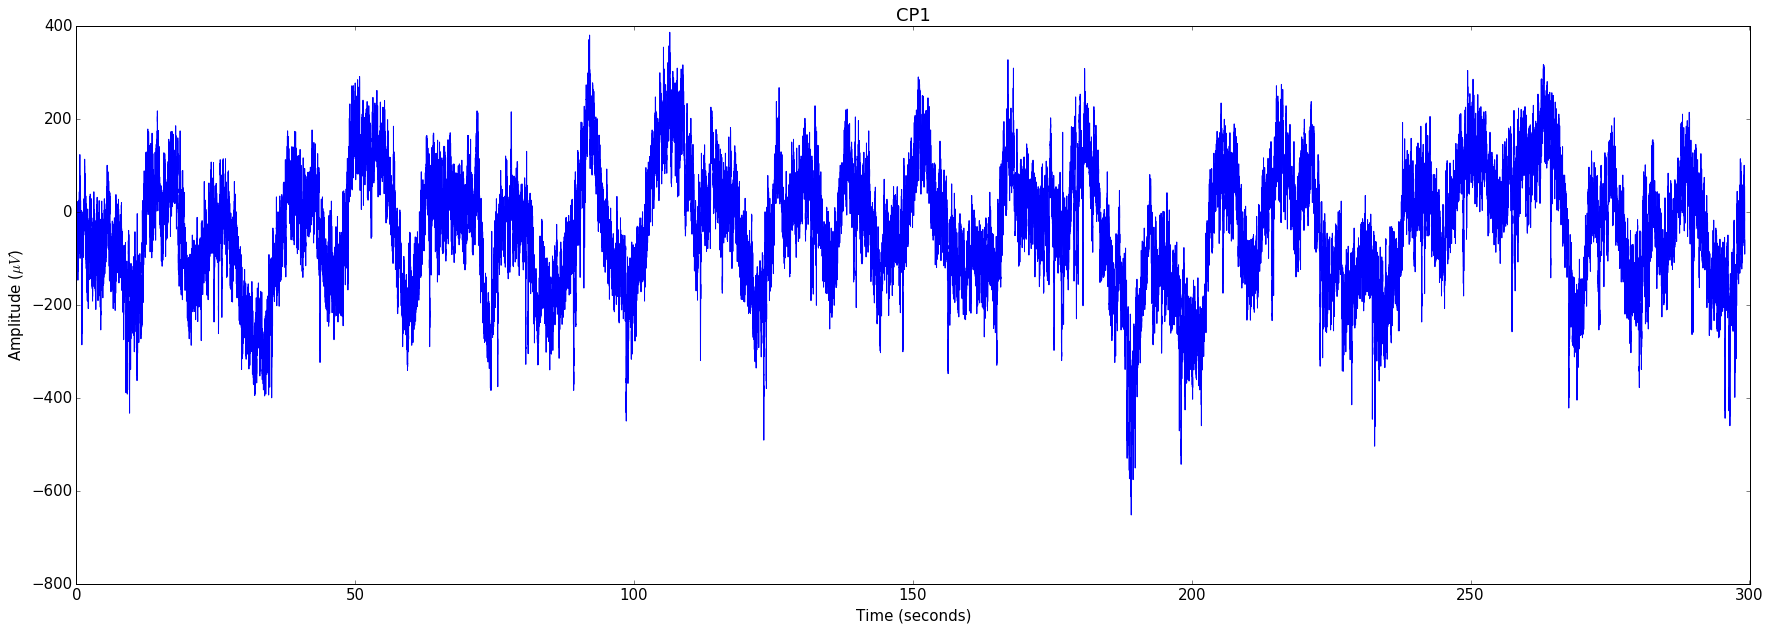

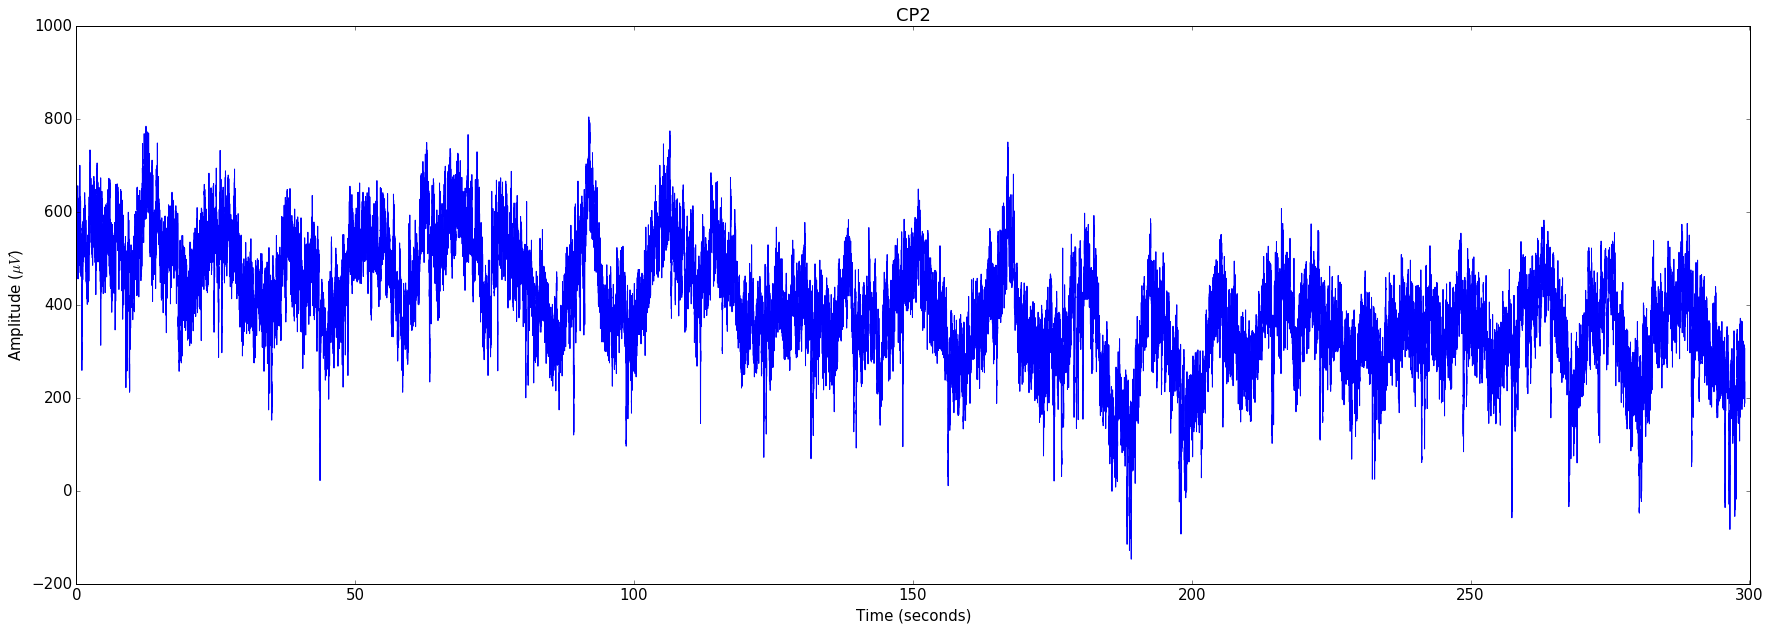

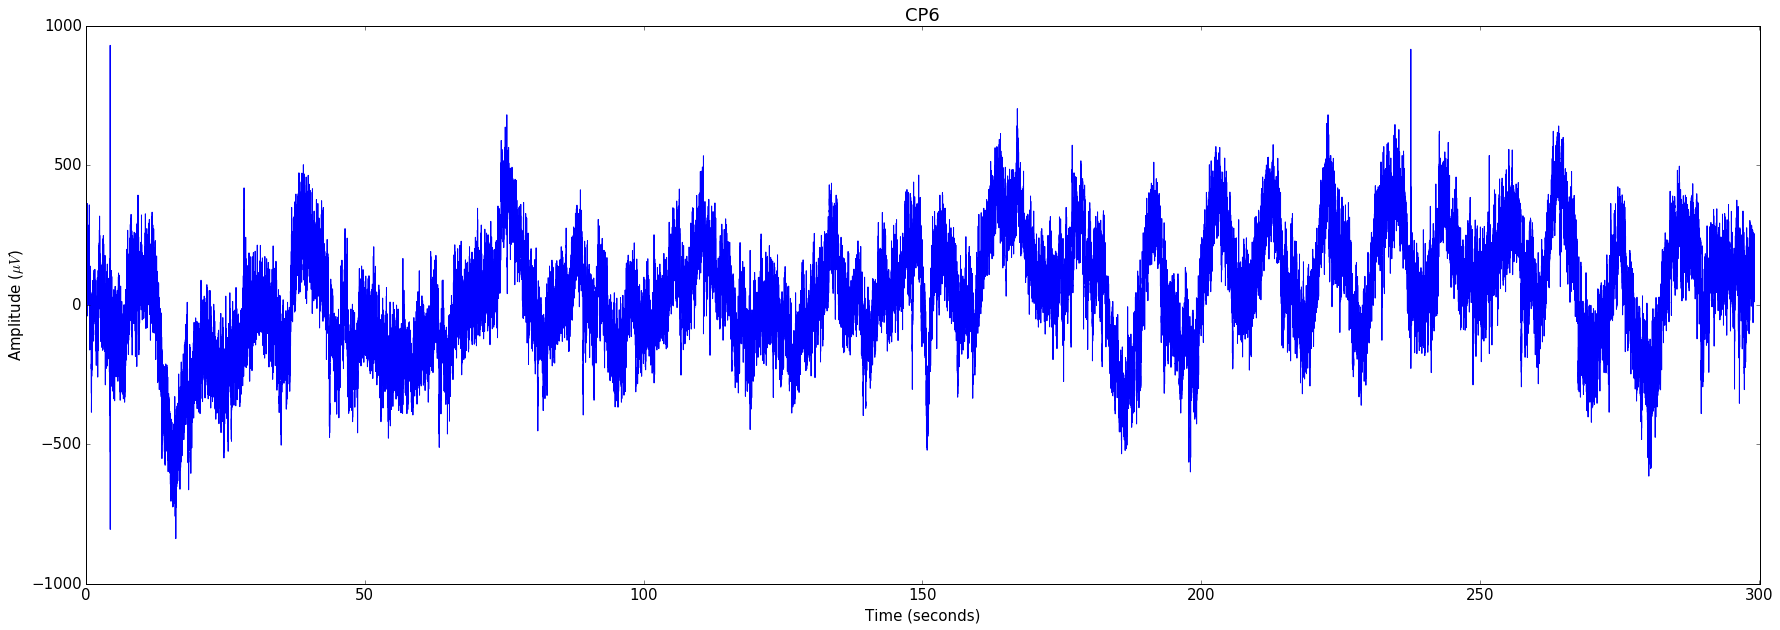

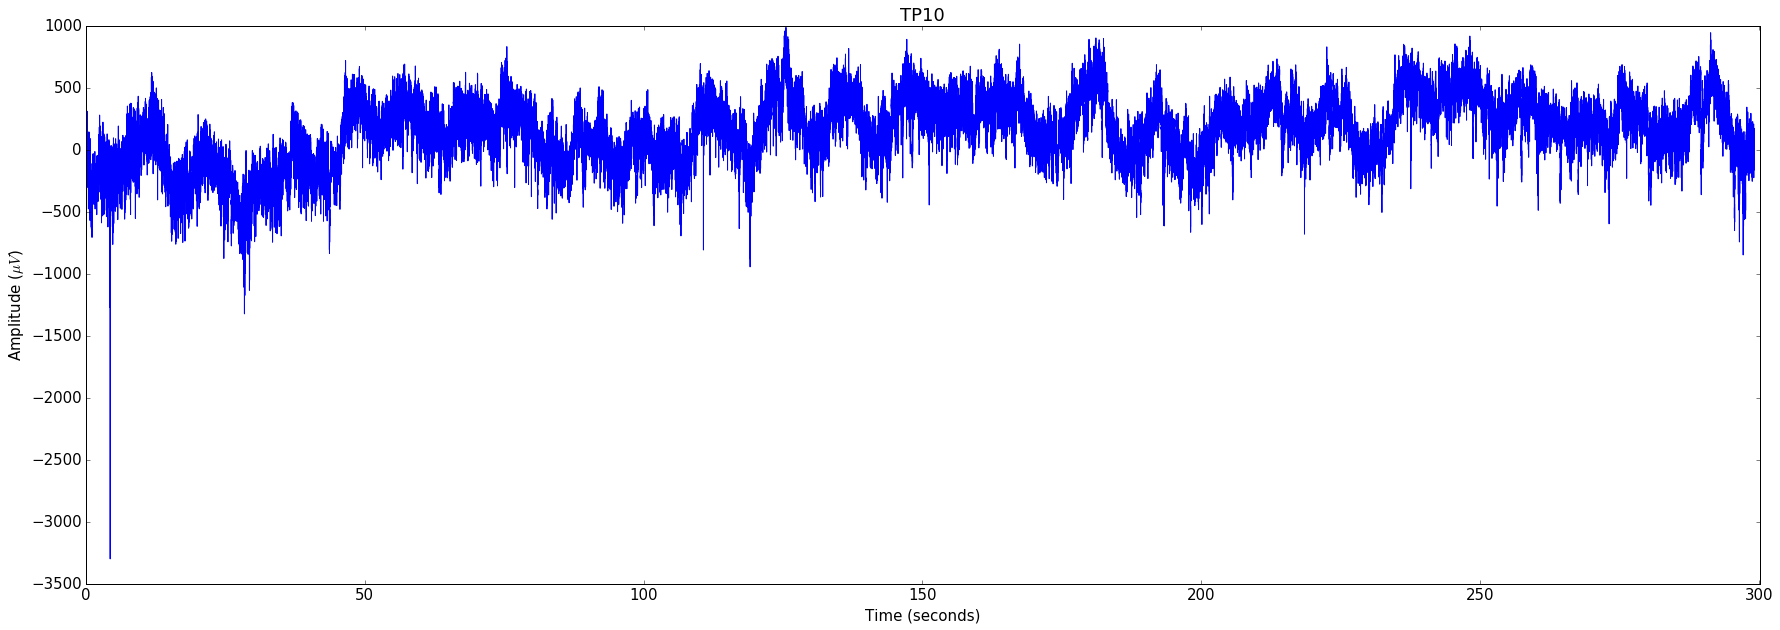

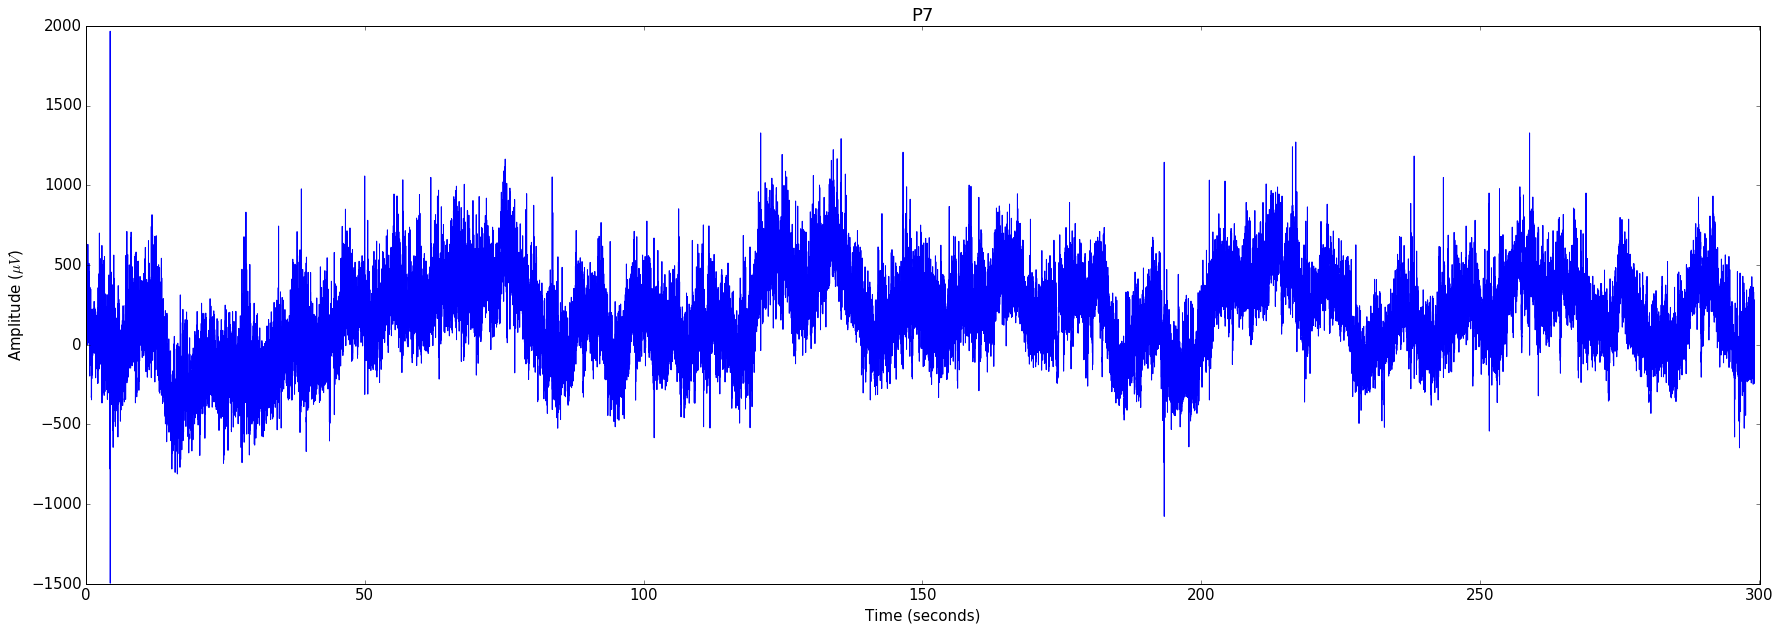

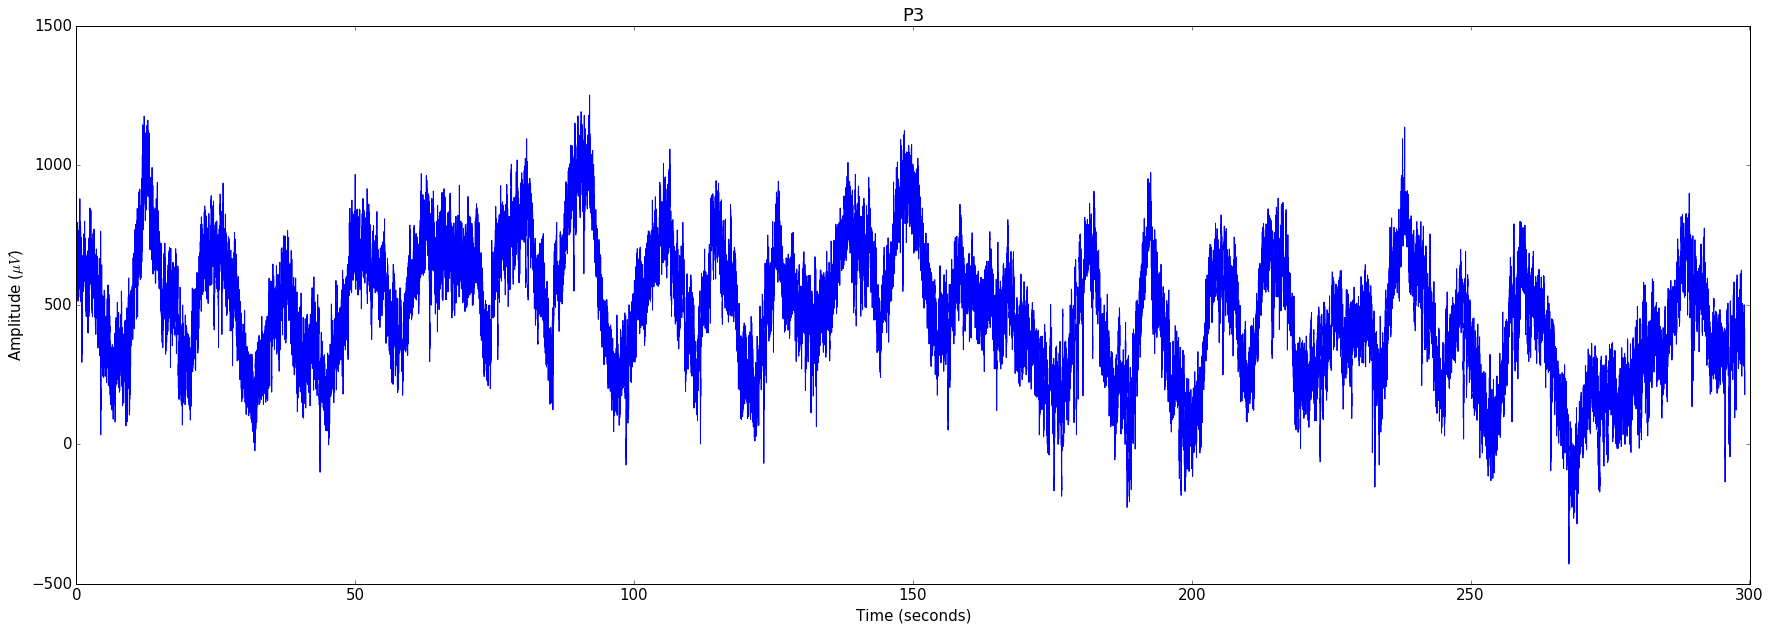

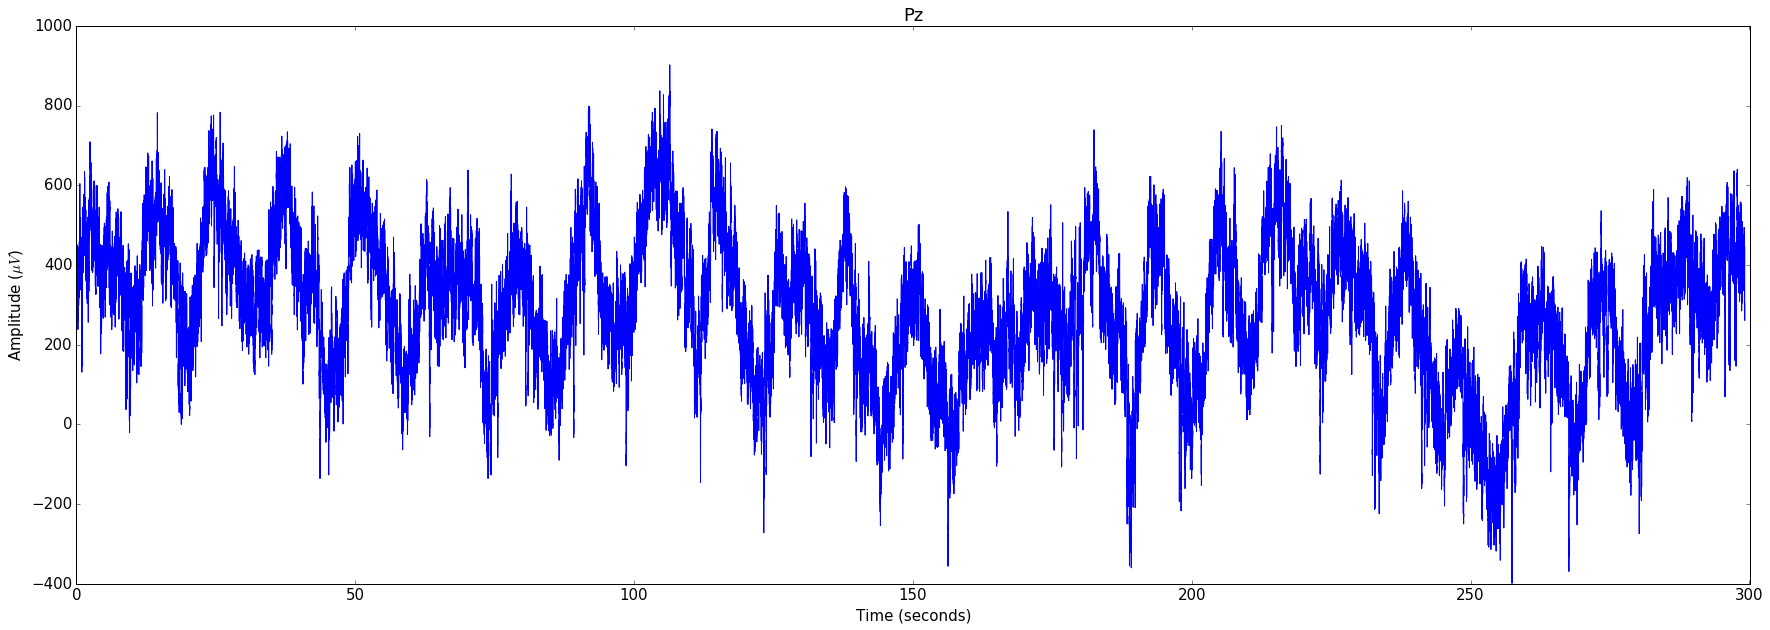

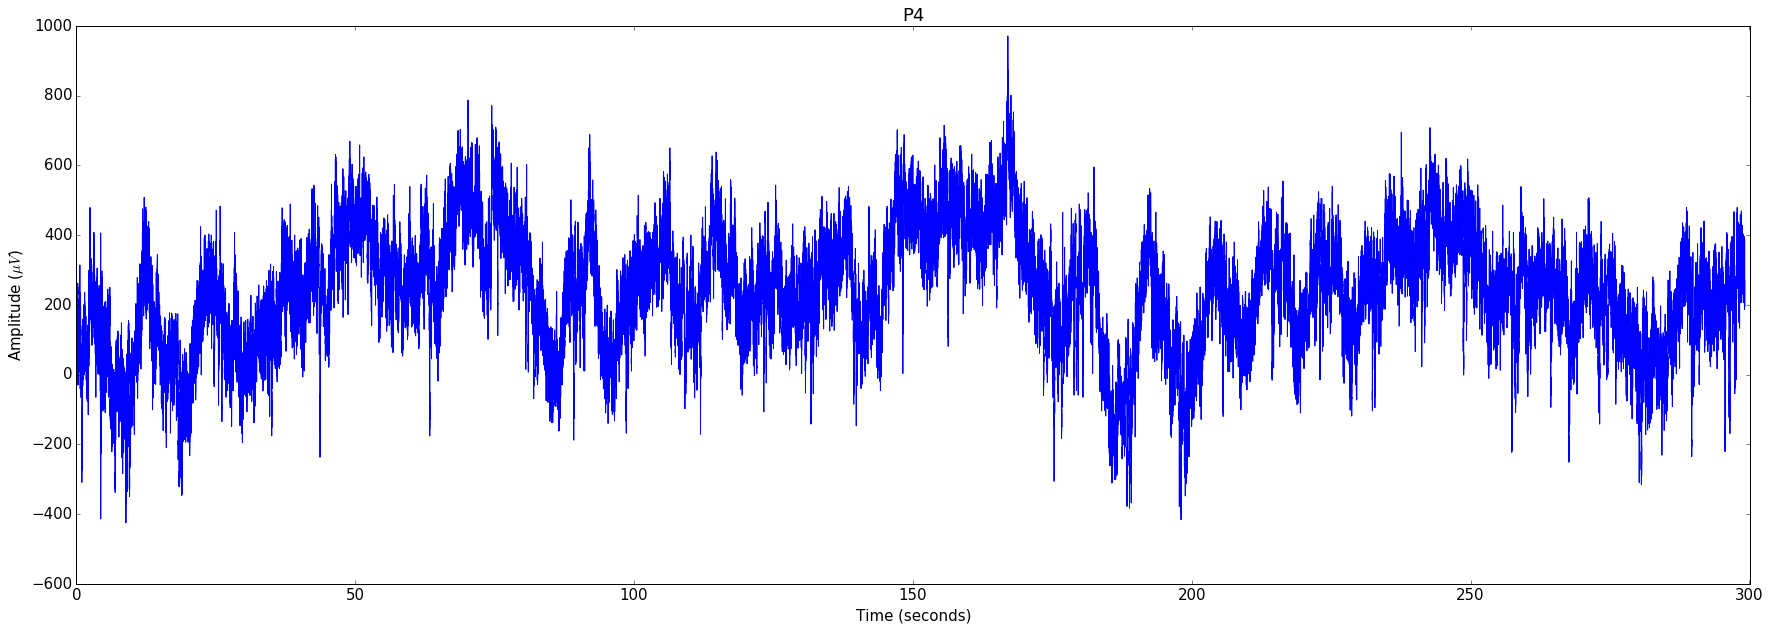

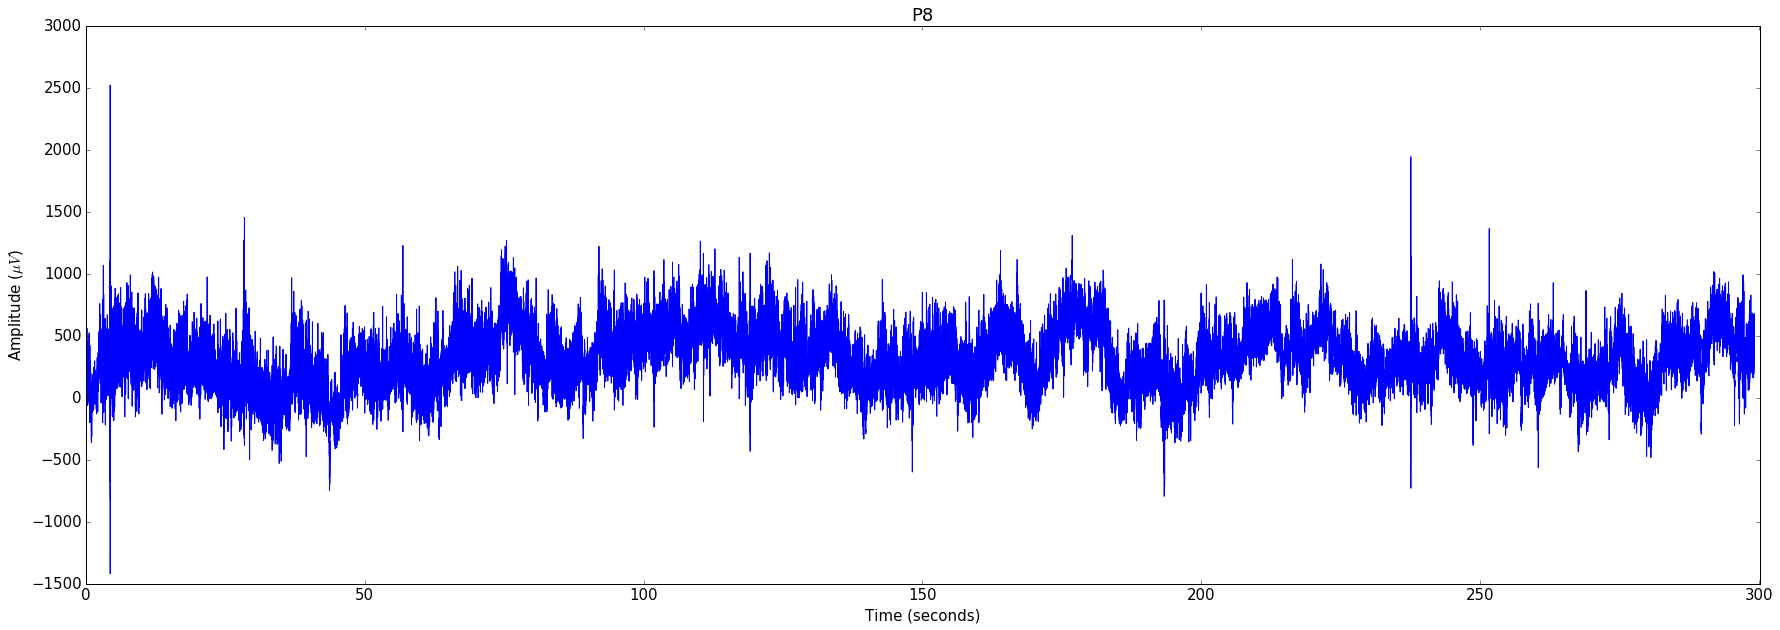

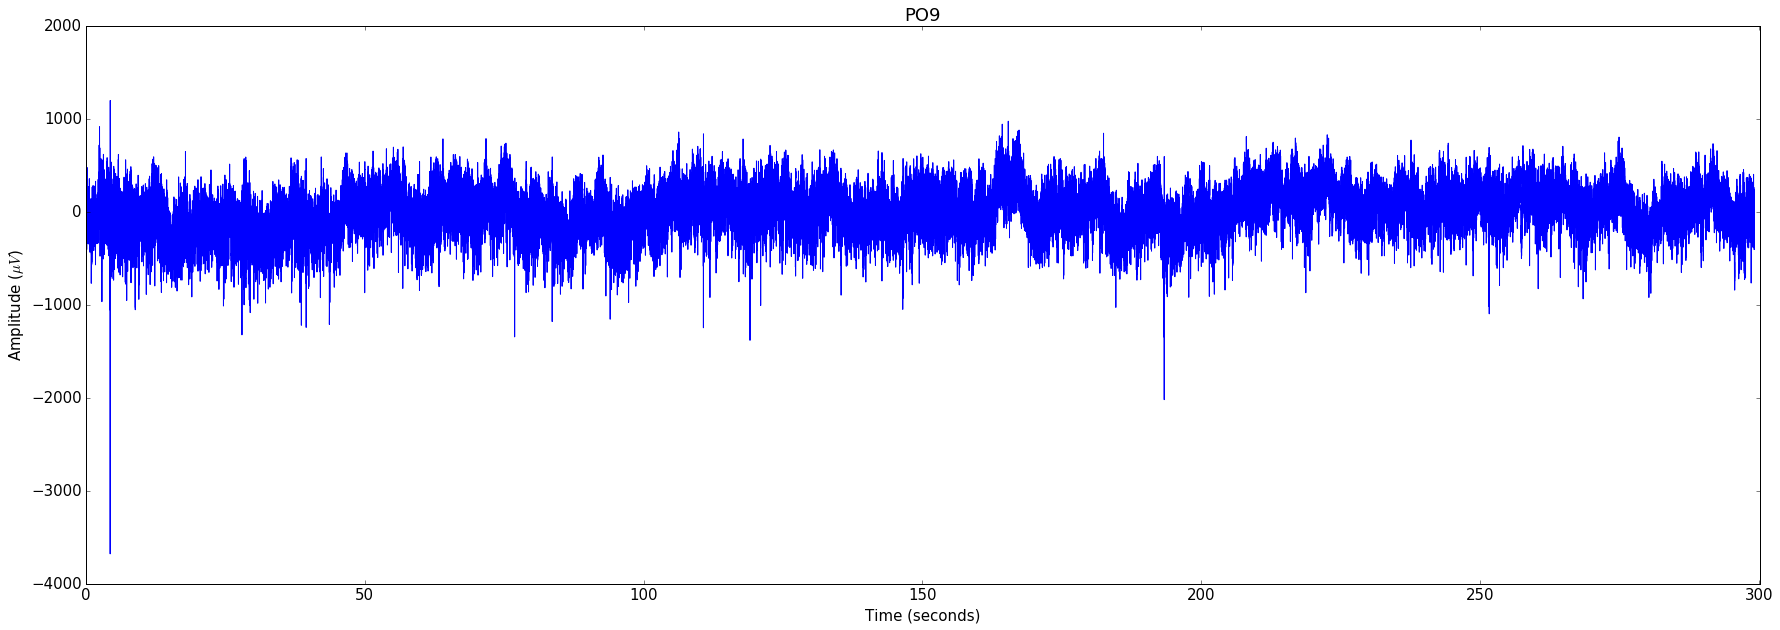

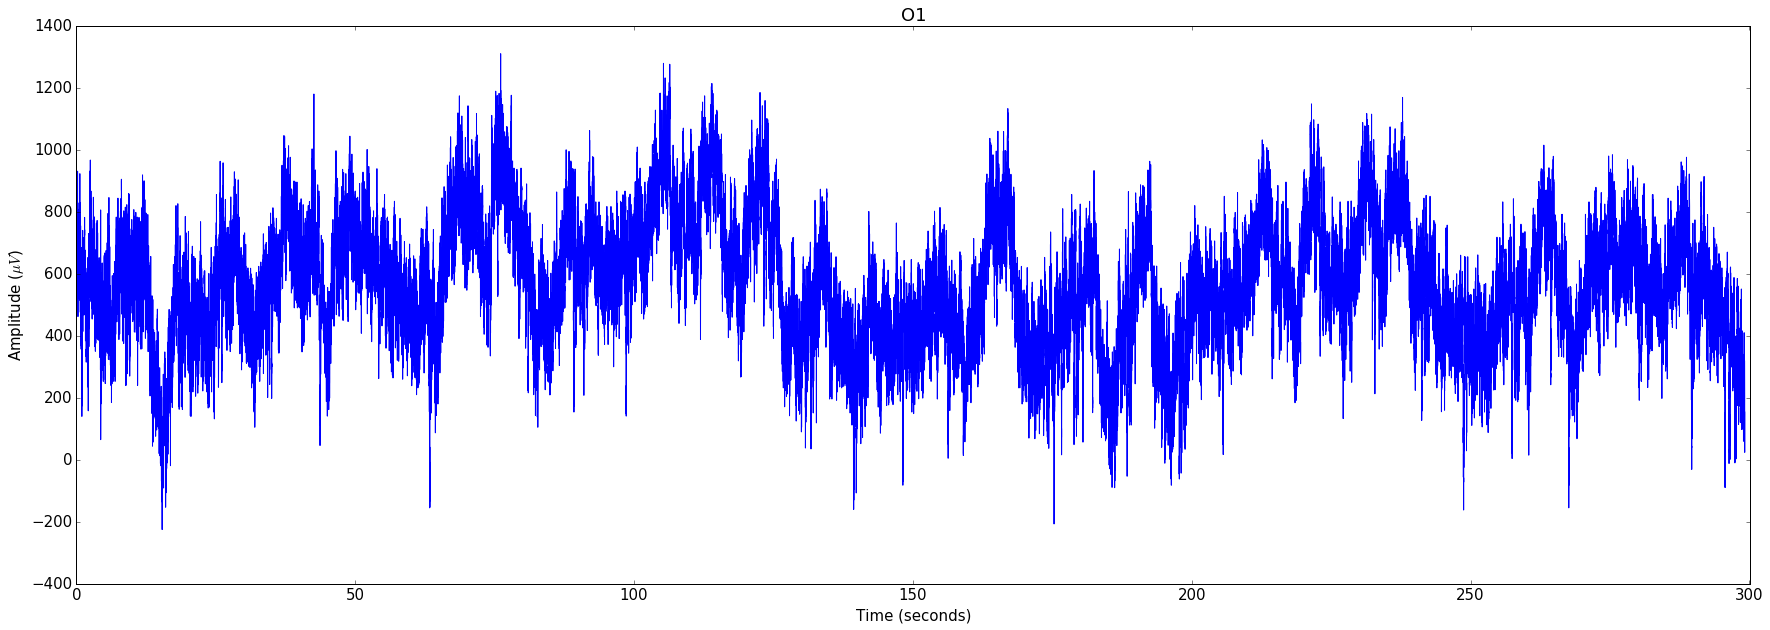

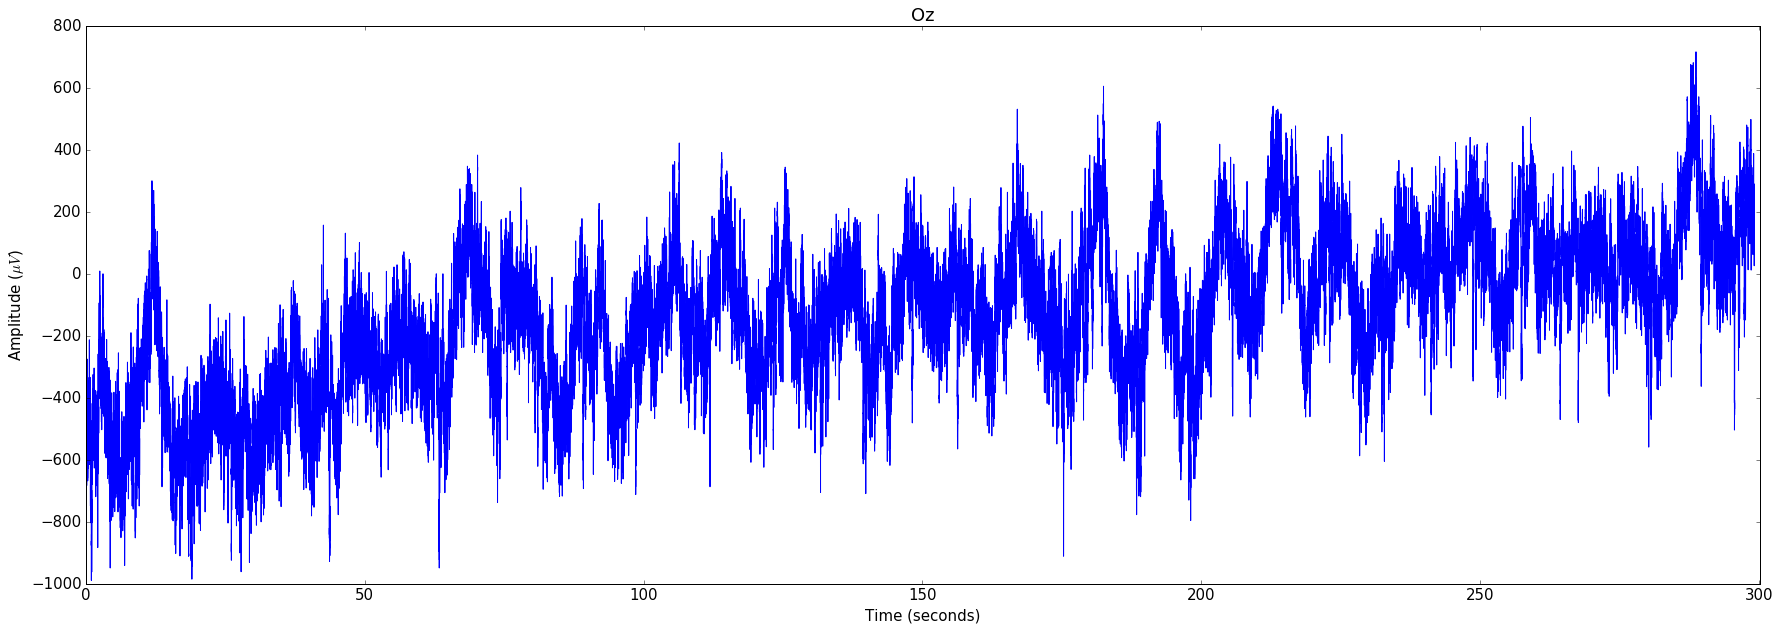

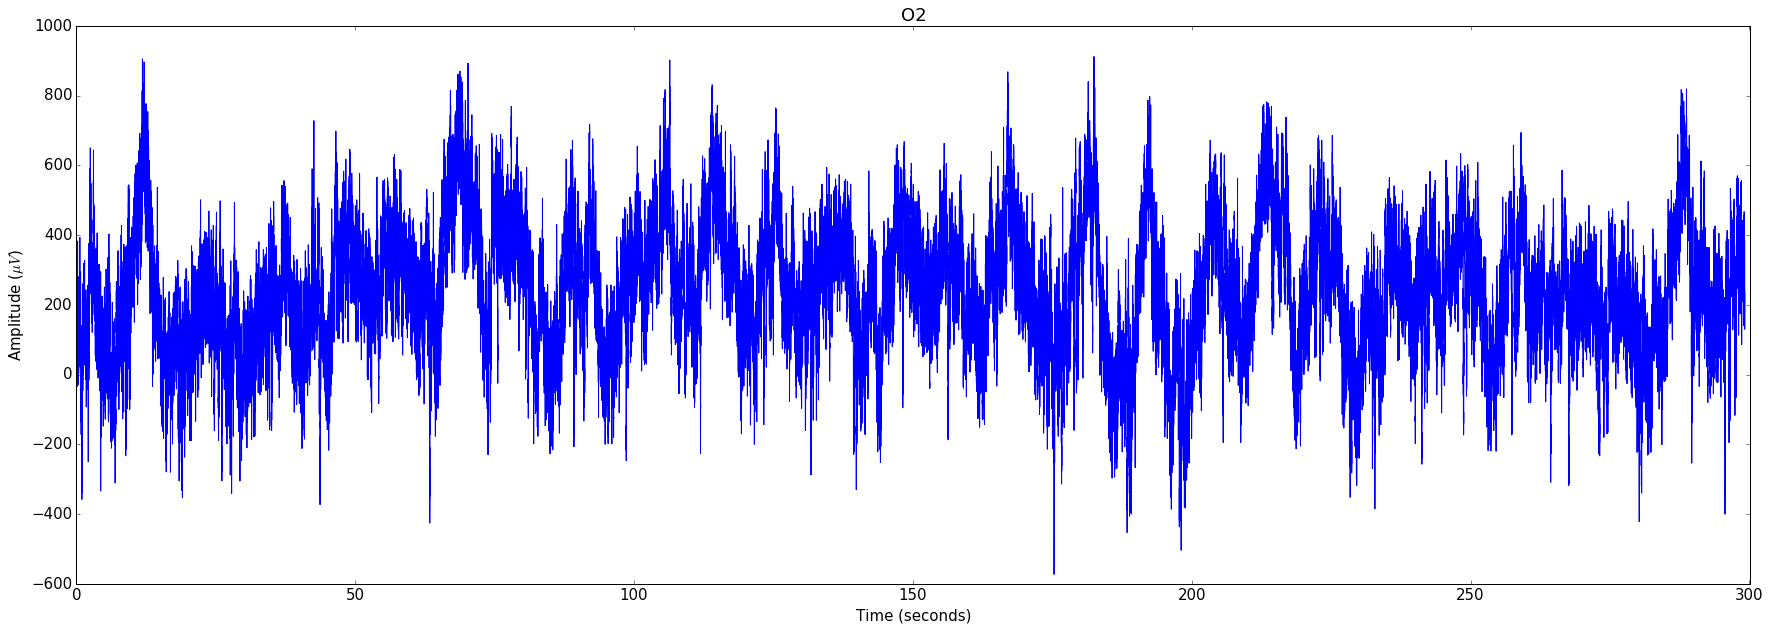

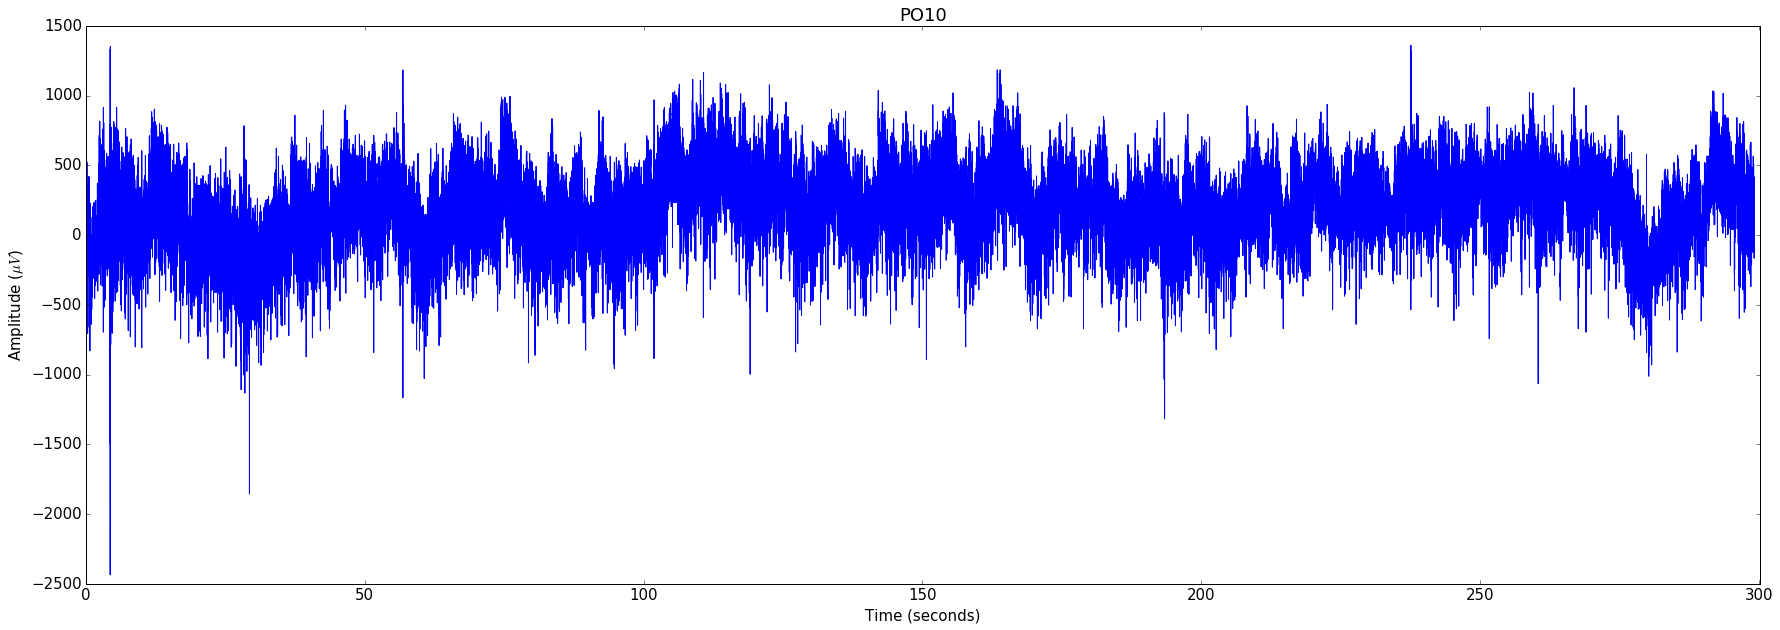

In [11]:
#let's look at the time series of all the plots
for col in series.columns:
    fig = plt.gcf()
    fig.set_size_inches((30, 10))
    #plt.plot(x_axis[:10000], series[col].values[:10000])
    plt.plot(x_axis, series[col].values)
    plt.xlabel('Time (seconds)')
    plt.ylabel(r'Amplitude ($\mu V$)')
    plt.xlim(0, x_axis[-1] + 1)
    #plt.xlim(0)
    plt.title(col)
    plt.show()
    plt.close()


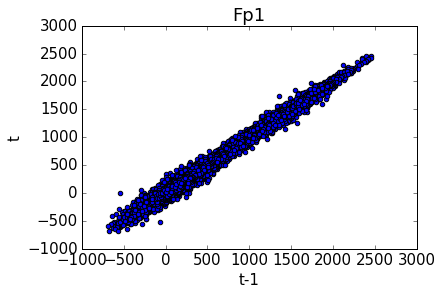

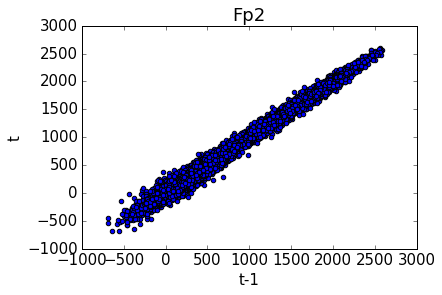

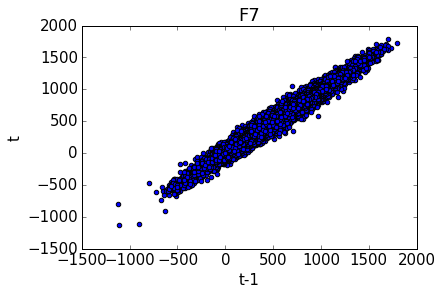

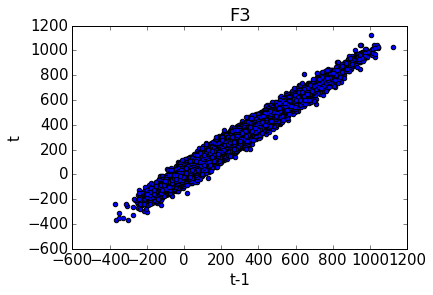

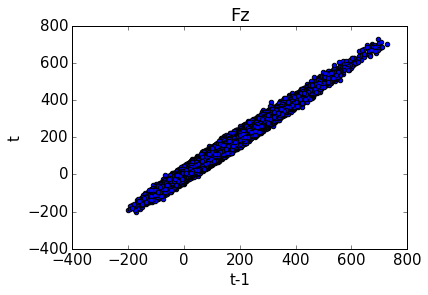

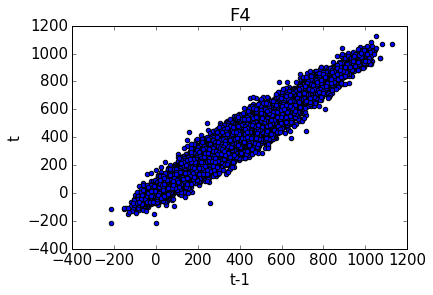

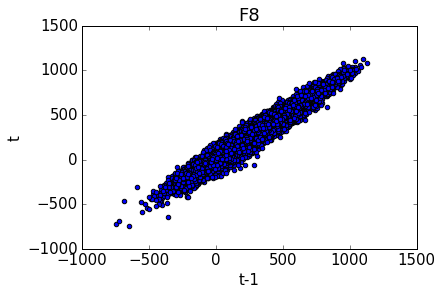

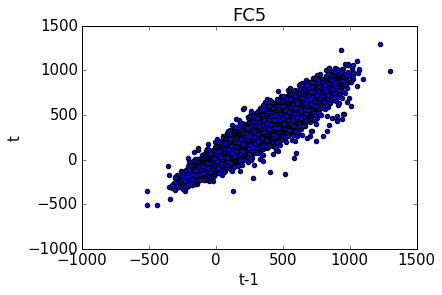

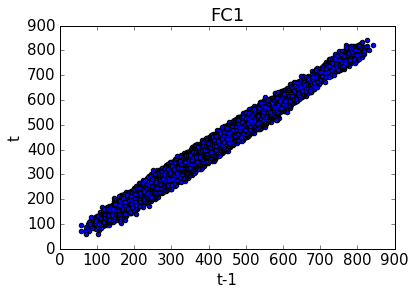

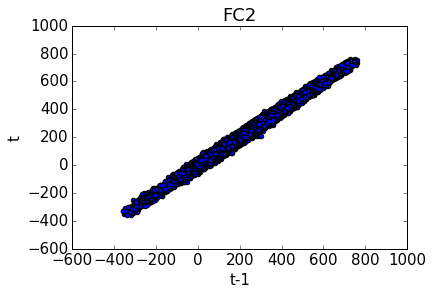

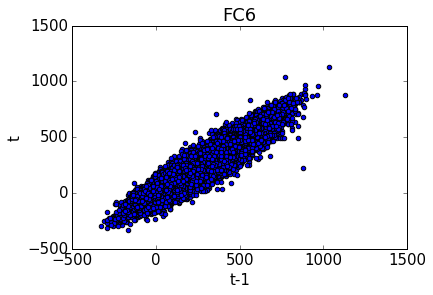

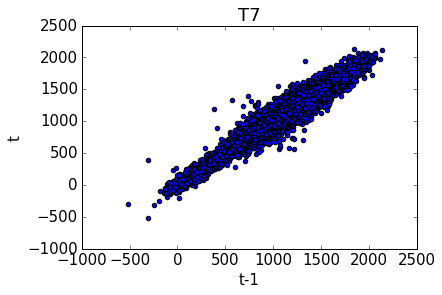

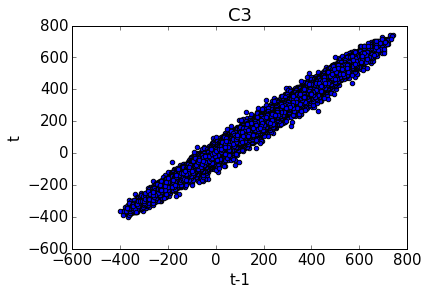

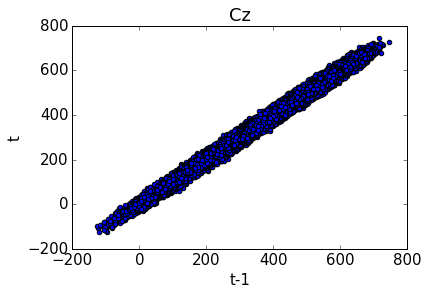

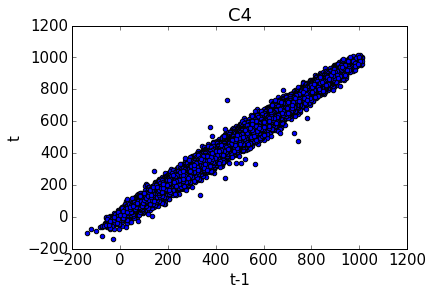

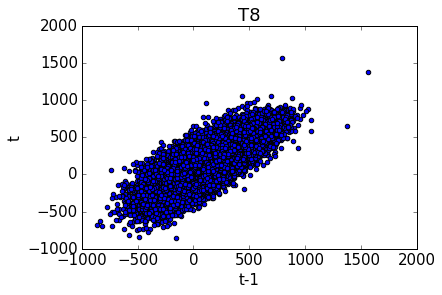

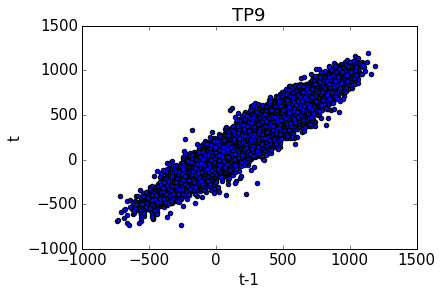

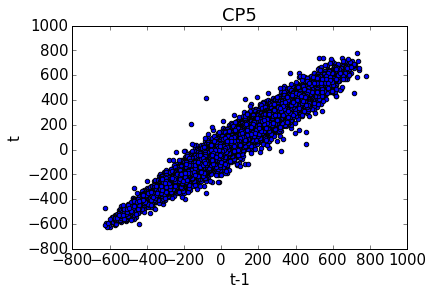

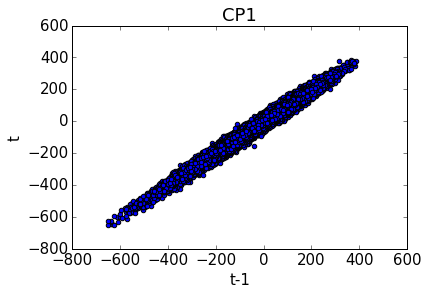

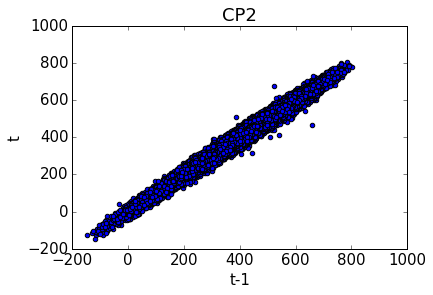

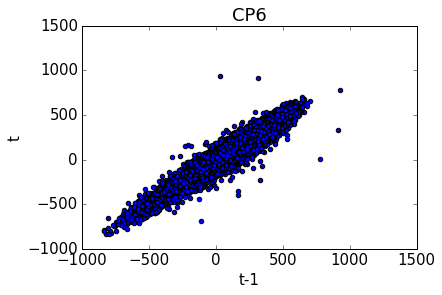

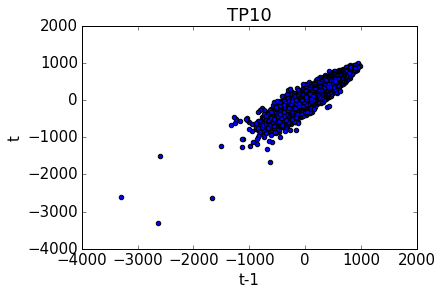

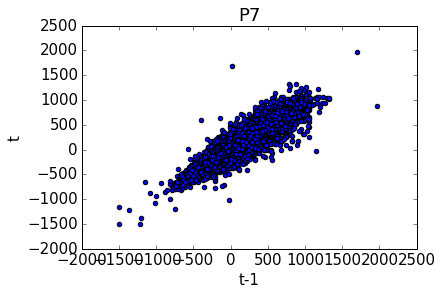

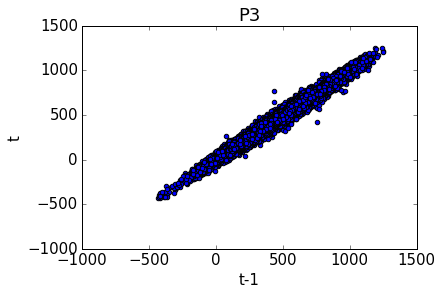

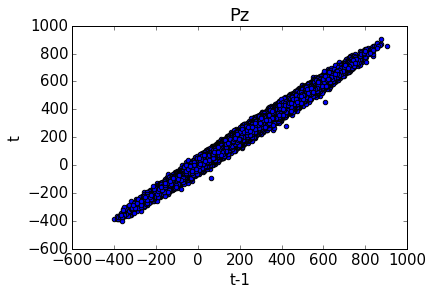

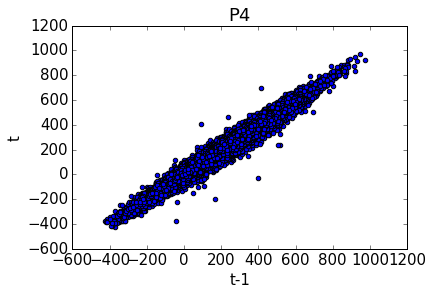

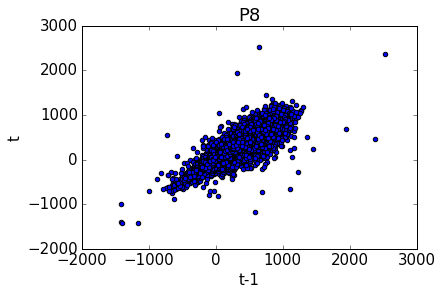

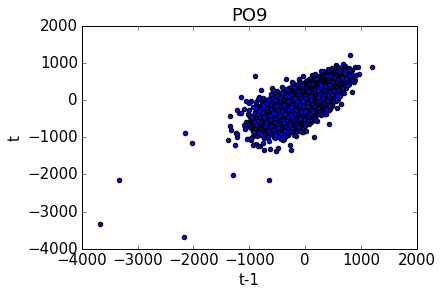

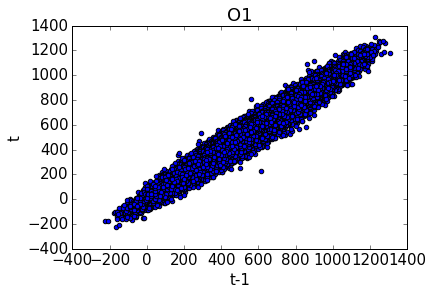

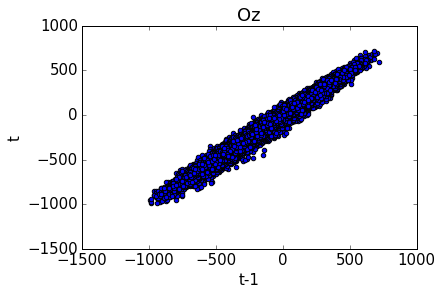

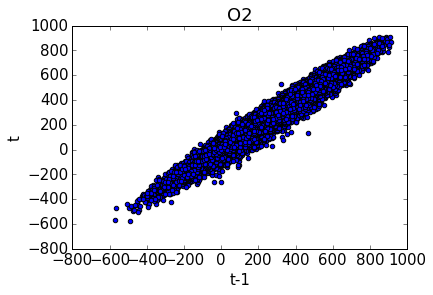

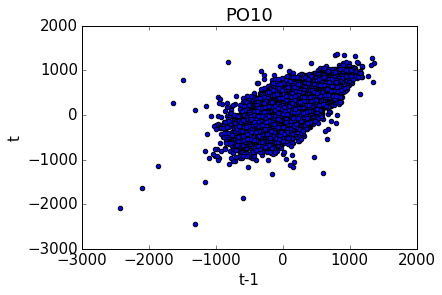

In [12]:
# autocorrelation plots
for col in series.columns:
    col_values = series[col].values
    plt.scatter(col_values[:-1], col_values[1:])
    plt.xlabel('t-1')
    plt.ylabel(r't')
    plt.title(col)
    plt.show()
    plt.close()

In [13]:
for i in range(series.shape[1]):
    print (np.corrcoef(series.values[1:, i], series.values[:-1, i])[0, 1])

0.992834746615
0.988989980009
0.988788448363
0.990232196359
0.990428697972
0.963931991565
0.974229786611
0.976075538227
0.991122622935
0.995459972765
0.961911052202
0.974052003807
0.993300030577
0.995261310477
0.992868742323
0.8844734271
0.965915808539
0.98541720134
0.990168837867
0.989076076009
0.977829440898
0.964608913626
0.957482850534
0.992125538521
0.993848286833
0.986782863262
0.919207906315
0.849662829359
0.979058821837
0.988640339552
0.979446994812
0.838775857492


In [14]:
covariance = np.cov(series.values.T)
corr = np.corrcoef(series.values.T)


for i in list(corr):
    print(i)

[ 1.          0.89408972  0.43006724  0.49299547  0.6005445   0.44548367
  0.36176113  0.24104519  0.00145967  0.00932904  0.09288104 -0.01219111
 -0.0675183  -0.01652639  0.05730244 -0.04697708 -0.07463239  0.04555406
 -0.1152199  -0.0744512  -0.06908421 -0.07712037 -0.0408247  -0.01234823
 -0.11494027 -0.07255538 -0.06042372 -0.04602453 -0.03771042 -0.18175078
 -0.12758072 -0.09235271]
[  8.94089717e-01   1.00000000e+00   3.38229133e-01   4.64731324e-01
   6.13137524e-01   4.89204493e-01   3.97088051e-01   1.88140743e-01
  -3.71240875e-05   5.85113701e-02   5.68572061e-02   2.28726534e-02
  -3.60141427e-02  -7.03498410e-02  -1.36359306e-02  -5.31952506e-02
  -6.24568029e-02   1.01043341e-02  -1.65075461e-01  -1.62203256e-01
  -8.81595913e-02  -7.03788300e-02  -4.80607518e-02  -5.67980160e-02
  -2.22555791e-01  -1.28605605e-01  -1.11202535e-01  -1.04309089e-01
  -1.05487384e-01  -1.74068777e-01  -1.85870014e-01  -1.13082335e-01]
[  4.30067242e-01   3.38229133e-01   1.00000000e+00   2.

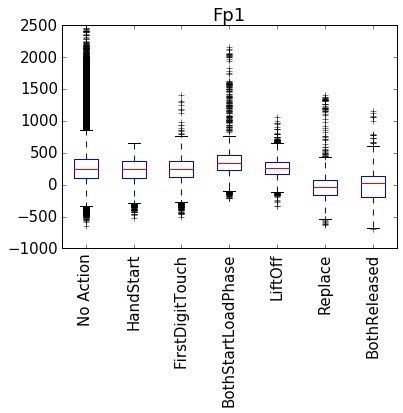

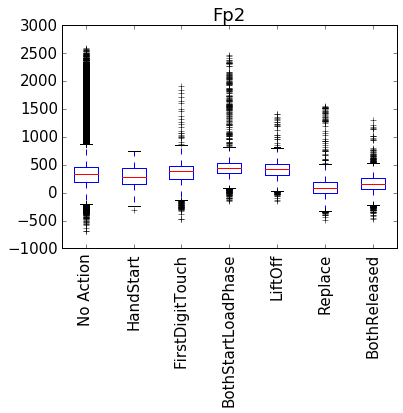

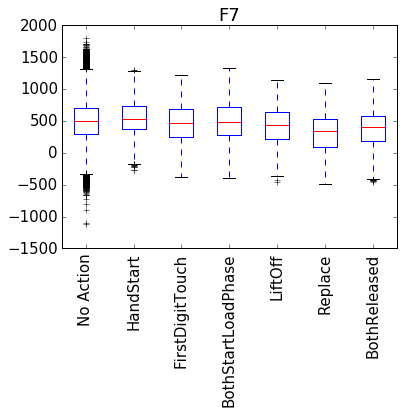

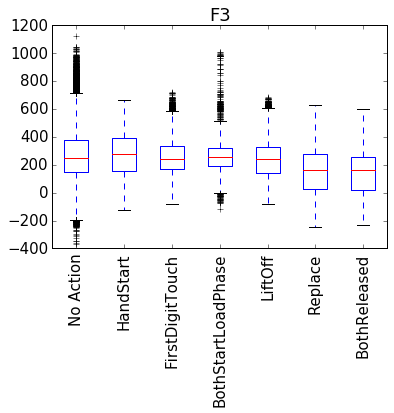

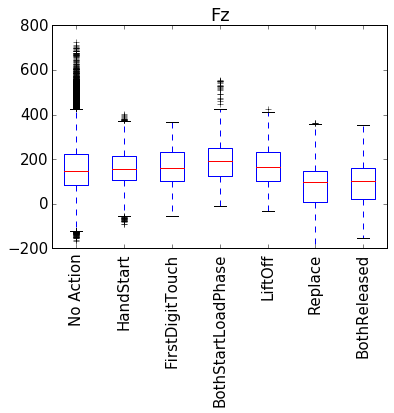

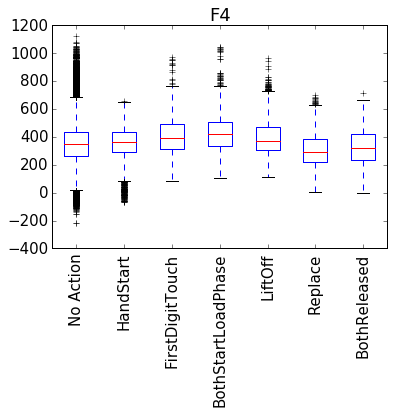

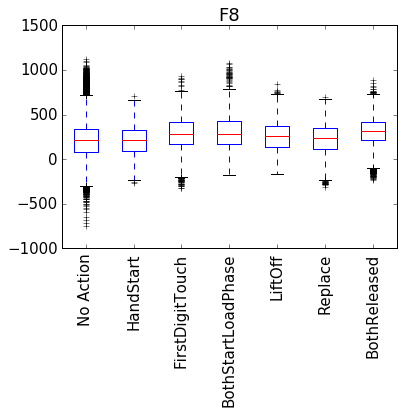

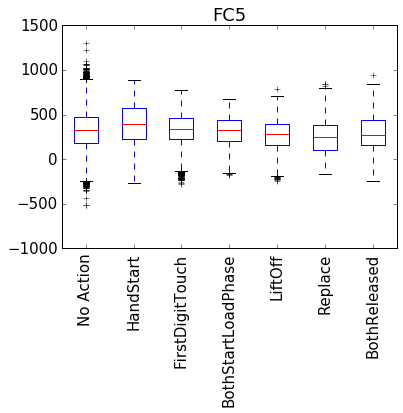

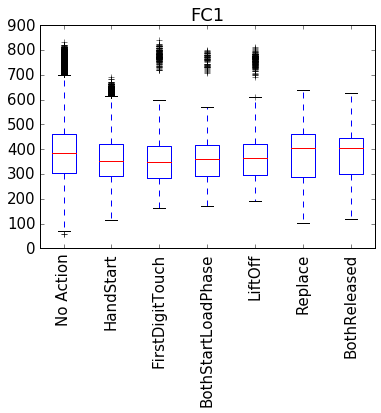

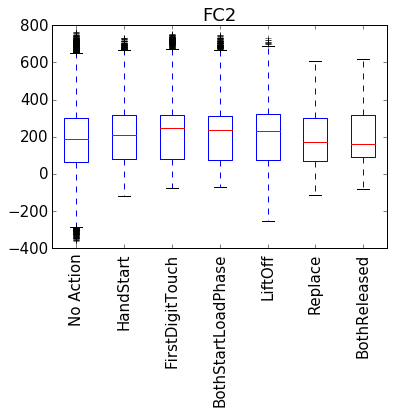

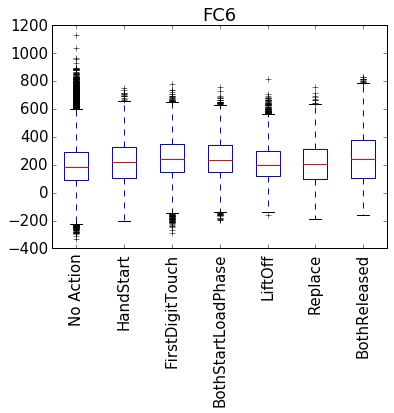

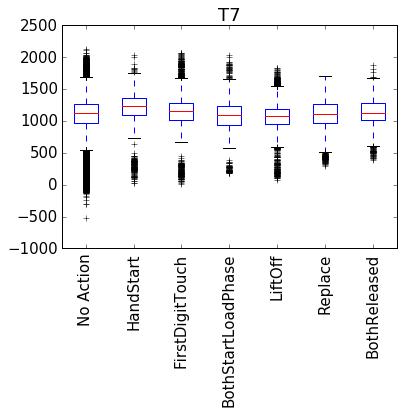

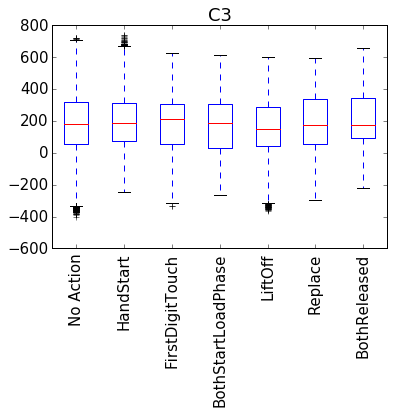

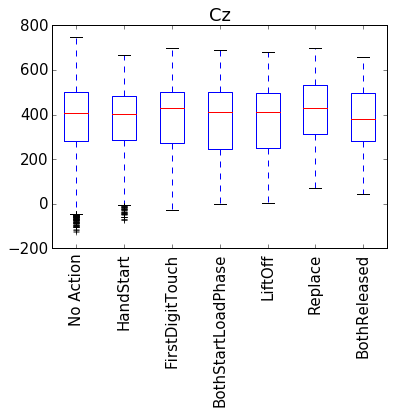

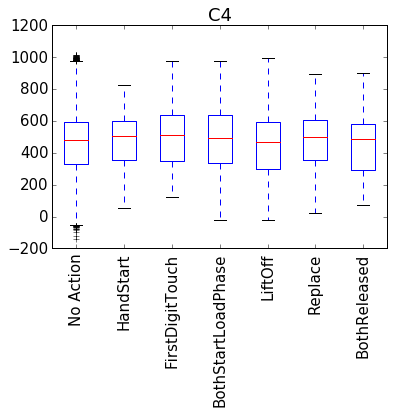

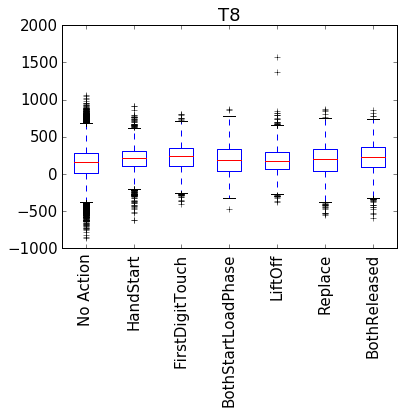

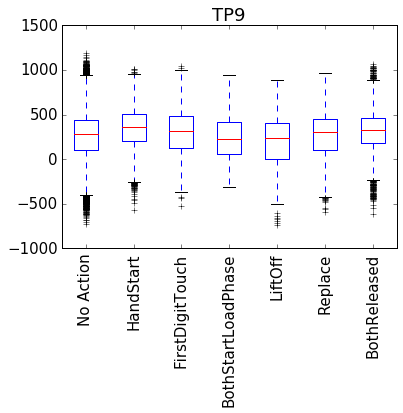

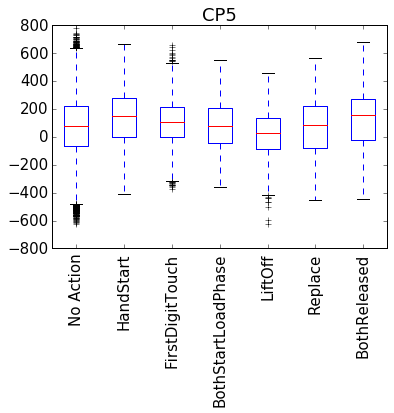

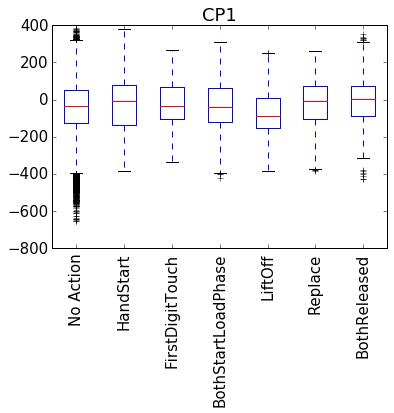

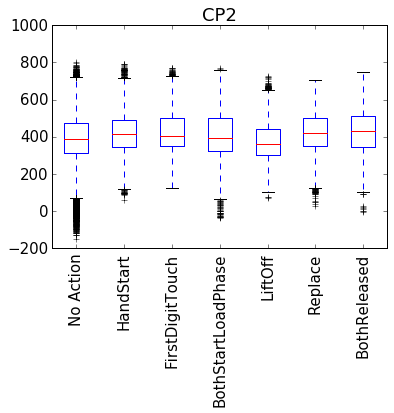

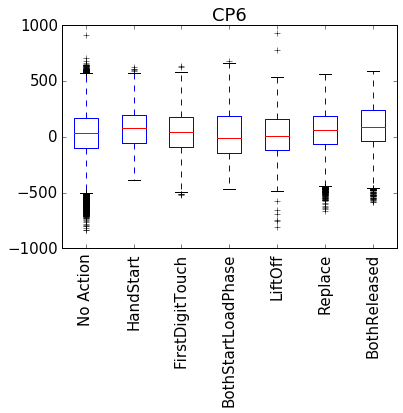

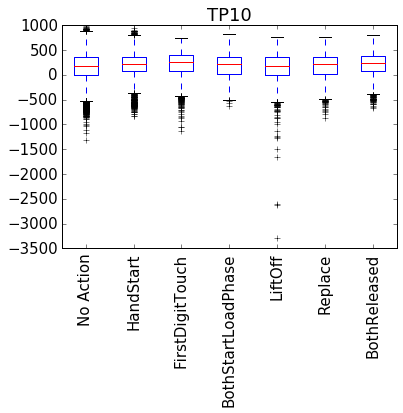

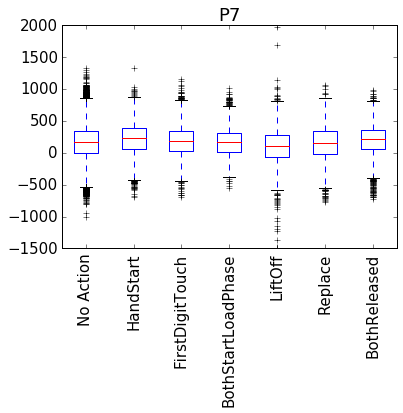

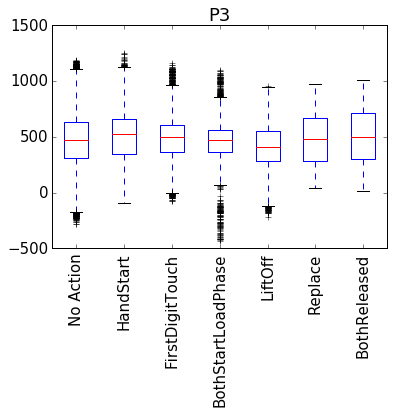

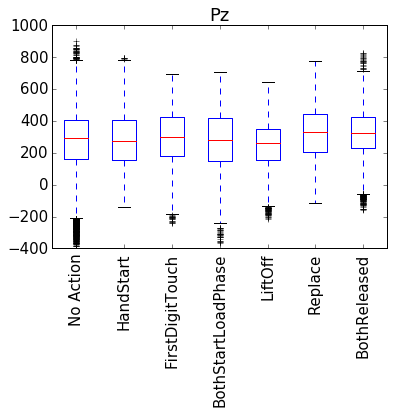

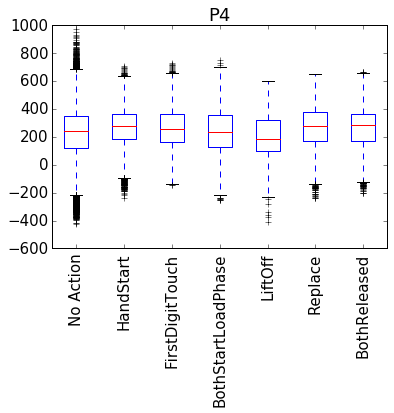

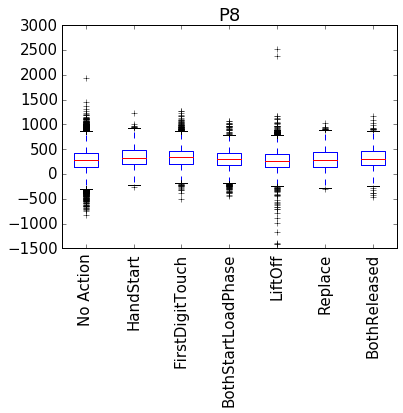

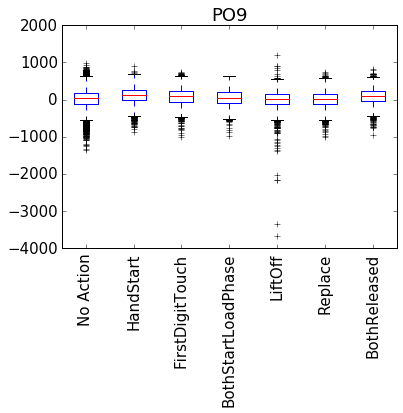

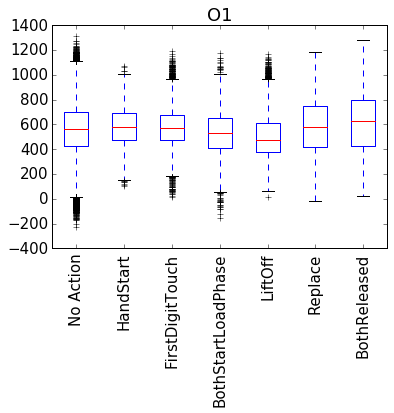

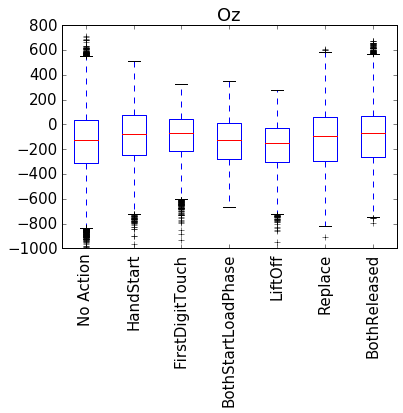

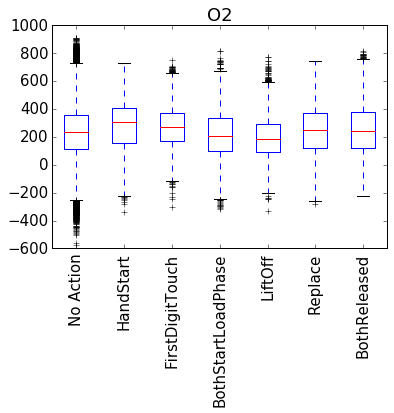

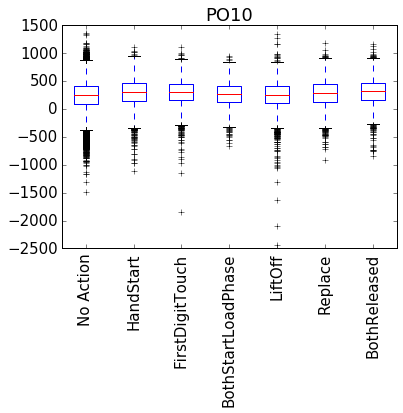

In [15]:
# distribution of the columns in the data split by features
num_classes = 7 # 6 activities plus no activity

for feature in series.columns:
    feature_by_label = []
    for i in range(num_classes):
        # for each class label, get the rows where the class happened
        indexes = np.where(labels == i)[0]
        feature_by_label.append(series[feature].values[indexes])
    plt.boxplot(feature_by_label)
    plt.title(feature)
    plt.xticks(locations[1:], names[:-1], rotation='vertical')
    plt.show()
    plt.close()

In [16]:
#logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

X = series.values
lr.fit(X, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
# lr.predict_proba gives a probability for each class
y_prob = lr.predict_proba(X)
y_prob



array([[  6.16505144e-01,   2.10557957e-02,   9.58777983e-03, ...,
          1.04420362e-02,   6.97014676e-02,   2.67621669e-01],
       [  5.95361892e-01,   1.99728208e-02,   9.15754365e-03, ...,
          1.16279018e-02,   8.89505435e-02,   2.69447814e-01],
       [  6.53384950e-01,   1.70965736e-02,   7.97351366e-03, ...,
          7.98968382e-03,   7.27024263e-02,   2.37040241e-01],
       ..., 
       [  9.37606323e-01,   3.16331409e-02,   4.43429483e-03, ...,
          2.29453238e-02,   1.40071122e-03,   5.27339779e-05],
       [  9.38488552e-01,   3.10484409e-02,   6.33805693e-03, ...,
          1.93993734e-02,   1.84985241e-03,   1.30790002e-04],
       [  9.09481586e-01,   6.03597288e-02,   7.81593702e-03, ...,
          1.77765424e-02,   1.64652572e-03,   1.42885478e-04]])

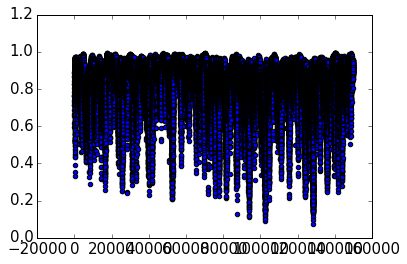

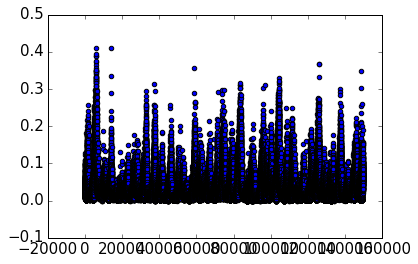

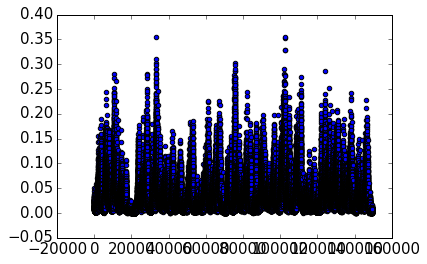

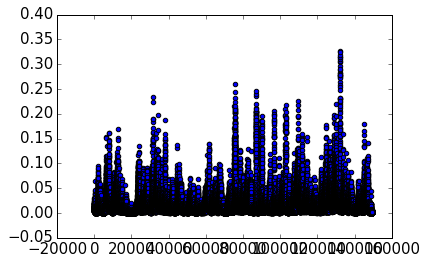

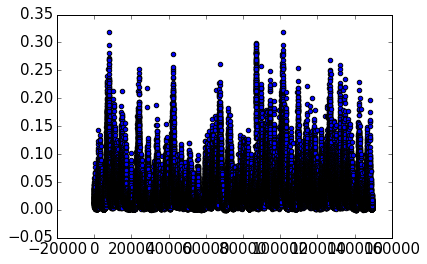

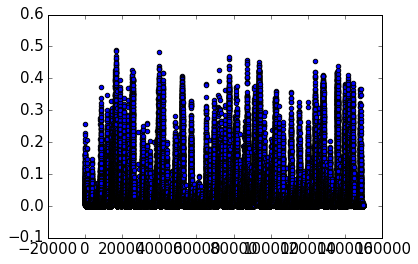

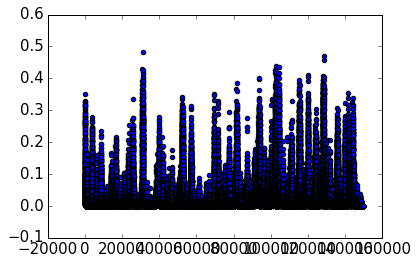

In [18]:
for i in range(num_classes):
    plt.scatter(np.arange(len(X)), y_prob[:, i])
    plt.show()
    plt.close()


In [20]:
from sklearn.metrics import roc_auc_score 

for i in range(num_classes):
    y_true = (1 * (labels == i))
    print(names[i], ": ", roc_auc_score(y_true, y_prob[:, i]), sep='')


No Action: 0.701561637127
HandStart: 0.775562174967
FirstDigitTouch: 0.746175595917
BothStartLoadPhase: 0.784925258041
LiftOff: 0.734003092251
Replace: 0.908739516834
BothReleased: 0.914235652769


In [22]:
def extract_features(ts):
    """
    ts is the time series of labels as a numpy array
    """
    last_state = 0
    last_state_nz = 6
    time_since_last_nz = 2
    duration_of_cur_state = 1
    X = []
    for i in range(len(ts)):
        cur_state = ts[i]
        X.append([last_state, last_state_nz, time_since_last_nz, duration_of_cur_state])
        
        if last_state == cur_state:
            duration_of_cur_state += 1
        else:
            duration_of_cur_state = 0
        if cur_state != 0:
            last_state_nz = cur_state
            time_since_last_nz = 1
        else:
            time_since_last_nz += 1
        last_state = cur_state
    X = np.array(X)
    return X

X = extract_features(labels)

lr = LogisticRegression()
lr.fit(X, labels)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

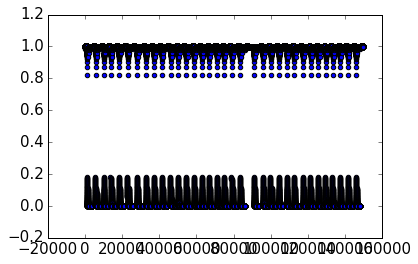

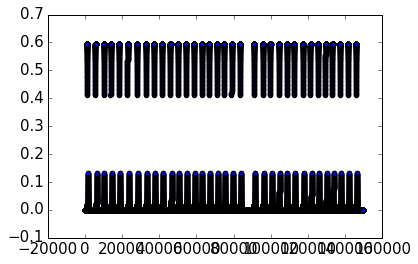

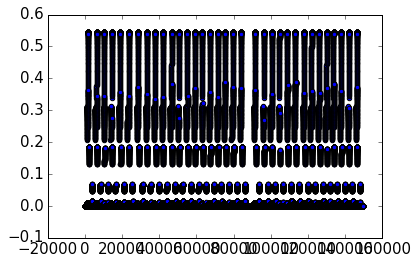

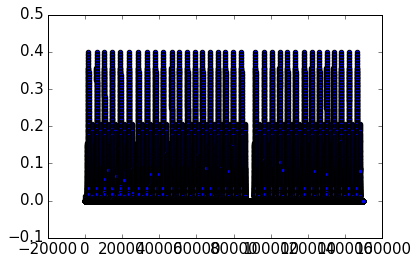

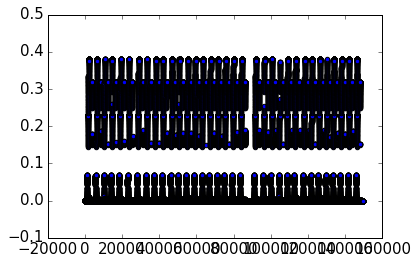

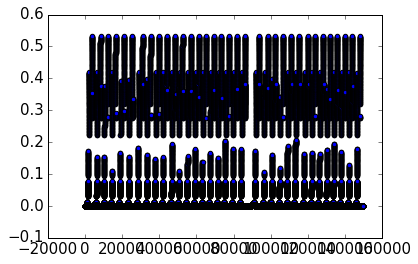

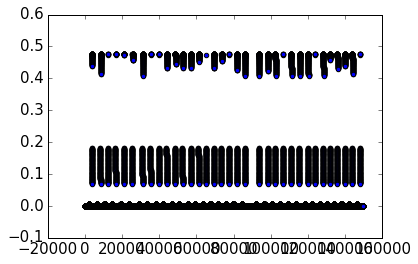

In [23]:
y_prob = lr.predict_proba(X)

for i in range(num_classes):
    plt.scatter(np.arange(len(X)), y_prob[:, i])
    plt.show()
    plt.close()

In [24]:
from sklearn.metrics import roc_auc_score

for i in range(num_classes):
    y_true = (1 * (labels == i))
    print(names[i], ": ", roc_auc_score(y_true, y_prob[:, i]), sep='')

No Action: 0.997757003428
HandStart: 0.99585868863
FirstDigitTouch: 0.998203788298
BothStartLoadPhase: 0.981513271147
LiftOff: 0.995427840618
Replace: 0.993238629948
BothReleased: 0.99817318036


In [25]:
from sklearn.metrics import precision_recall_fscore_support
y_true = labels
y_pred = np.argmax(y_prob, axis=1)
prec, rec, fscore, supp = precision_recall_fscore_support(y_true, y_pred)
print ("Precision:", ["%.3f" % i for i in prec])
print ("Recall:", ["%.3f" % i for i in rec])
print ("F-1 Score:", ["%.3f" % i for i in fscore])


Precision: ['0.999', '0.993', '0.772', '0.672', '0.999', '0.794', '0.989']
Recall: ['0.999', '0.993', '0.973', '0.370', '0.669', '0.993', '0.989']
F-1 Score: ['0.999', '0.993', '0.861', '0.477', '0.801', '0.883', '0.989']
